# Notebook Structure


- **1) Classification**
  - **1.1) Pipeline 1**
    - 1.1.1) Exploratory Data Analysis and Data Normalization
    - 1.1.2) Feature Encoding and Selection
    - 1.1.3) Decision Tree Classifier
  - **1.2) Pipeline 2**
    - 1.2.1) Systematic Sampling
    - 1.2.2) Feature Encoding and Selection
    - 1.2.3) Support Vector Classifier
  - **1.3) Pipeline 3**
    - 1.3.1) Random Forest Classifier
  - **1.4) Pipeline 4**
    - 1.4.1) KNN Classifier
  - **1.5) Conclusion and Discussion**

- **2) Regression**
  - **2.1) Exploratory Data Analysis and Data Normalization**
  - **2.2) Target Variable "a"**
    - 2.2.1) Pipeline 211 - Support Vector Regressor
    - 2.2.2) Pipeline 212 - Decision Tree Regressor
    - 2.2.3) Pipeline 213 - Random Forest Regressor
    - 2.2.4) Pipeline 214 - Polynomial Regression
    - 2.2.5) Observation and Conclusion
  - **2.3) Target Variable "mu"**
    - 2.3.1) Pipeline 221 - Support Vector Regressor
    - 2.3.2) Pipeline 222 - Decision Tree Regressor
    - 2.3.3) Pipeline 223 - Random Forest Regressor
    - 2.3.4) Pipeline 224 - Polynomial Regression
    - 2.3.5) Observation and Conclusion
  - **2.4) Target Variable "tau"**
    - 2.4.1) Pipeline 231 - Support Vector Regressor
    - 2.4.2) Pipeline 232 - Decision Tree Regressor
    - 2.4.3) Pipeline 233 - Random Forest Regressor
    - 2.4.4) Pipeline 234 - Polynomial Regression
    - 2.4.5) Observation and Conclusion
  - **2.5) Target Variable "a0"**
    - 2.5.1) Pipeline 241 - Support Vector Regressor
    - 2.5.2) Pipeline 242 - Decision Tree Regressor
    - 2.5.3) Pipeline 243 - Random Forest Regressor
    - 2.5.4) Pipeline 244 - Polynomial Regression
    - 2.5.5) Observation and Conclusion

- **3) NLP**
  - **3.1) Pipeline 1**
    - 3.1.1) Exploratory Data Analysis
    - 3.1.2) Preprocessing and Normalization
    - 3.1.3) Term Frequency-Inverse Document Frequency Transformation
  - **3.2) Pipeline 2**
    - 3.2.1) Bag of Words Transformation
  - **3.3) Conclusion and Discussion**


In [ ]:
"""
Importing all necessary packages for all 3 parts
Python Version used: 3.10.4
IDE used : VSCode
"""

import numpy as np
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, classification_report, 
    confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, 
    r2_score, mean_squared_error, mean_absolute_error
)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.decomposition import PCA

# The below variable will be used to set the random seed
myStudentNumber = 230164781



Some points regarding the naming converntions of the dataframes and variables:

- Since we are required to create 4 pipelines for this part, each pipeline will have its own dataframe.
 
- `df {partNumber} {pipelineNumber}`

- for e.g. df1 is the dataframe used to import data from the csv file, whereas df11 is the dataframe used for the first pipeline of part 1.

- The naming convention for variables follows `camelCase` to create a distinction between variables and columns, which are in `snake_case`. This choice is both functional and a personal preference.

- This naming convension will be consistant across all the parts



---
---
# 1) Classification

In [3]:
""" 
Reading the csv file
"""
df1 = pd.read_csv("./fars.csv")

### 1.1) Pipeline 1

#### 1.1.1) Exploratory Data Analysis and Data Normalization

In [5]:
# Getting basic information like datatypes of each column of the dataset
df11 = df1.copy()
df11.info()


print()

# Checking if there are any null values in the dataset
print("Count of null valules for each column in the Data Frame")
print(df11.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100968 entries, 0 to 100967
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   CASE_STATE                           100968 non-null  object
 1   AGE                                  100968 non-null  int64 
 2   SEX                                  100968 non-null  object
 3   PERSON_TYPE                          100968 non-null  object
 4   SEATING_POSITION                     100968 non-null  object
 5   RESTRAINT_SYSTEM-USE                 100968 non-null  object
 6   AIR_BAG_AVAILABILITY/DEPLOYMENT      100968 non-null  object
 7   EJECTION                             100968 non-null  object
 8   EJECTION_PATH                        100968 non-null  object
 9   EXTRICATION                          100968 non-null  object
 10  NON_MOTORIST_LOCATION                100968 non-null  object
 11  POLICE_REPORTED_ALCOHOL_IN

The dataset has over 100K records and 30 columns, out of which the last column "INJURY_INJURY_SEVERITY" is the target column. So there are a total of 29 features, 5-numerical features and 24-non numerical features. Absence of null values makes it bit easy for us to preprocess the data

In [6]:
# Creating a list to store all the feature names for easy access. Seperating it by datatypes for convinence
numericalColumns = df11.select_dtypes(include=['int64']).columns.to_list()
nonNumericalColumns = df11.select_dtypes(include=['object']).columns.to_list()

#removing the last column name(target variable) from the list and storing it in a seperate variable
targetVariable = nonNumericalColumns.pop()

##### 1.1.1.1) Non Numerical Columns

In [7]:
"""
Exploratory Data Analysis of Non numerical Variables
"""

# Total number of rows
totalRows = len(df11)

# Lists to store columns based on 'Unknown' percentages
colsWithlessThan5Unknown = []
colsWithmoreThan5Unknown = []


summary = []

# Iterating through non-numerical columns
for columns in nonNumericalColumns:
    uniqueValues = df11[columns].unique()  # Get unique values
    unknownCount = (df11[columns] == "Unknown").sum()
    unknownPercentage = (unknownCount / totalRows) * 100

    # Categorising columns based on unknown percentages(we are setting 5% as threshold)
    if 0 < unknownPercentage < 5 and columns != targetVariable:
        colsWithlessThan5Unknown.append(columns)
    elif unknownPercentage > 5 and columns != targetVariable:
        colsWithmoreThan5Unknown.append(columns)

    # Appending to summary 
    summary.append({
        'Column': columns,
        'Unique Values': uniqueValues,
        'Unknown Count': unknownCount,
        'Unknown Percentage(%)': unknownPercentage
    })

# Converting summary to a DataFrame for displaying
summaryDF = pd.DataFrame(summary)

# Showing count of unique values
summaryDF['Unique Values'] = summaryDF['Unique Values'].apply(lambda x: len(x))  

display(summaryDF)






,Column,Unique Values,Unknown Count,Unknown Percentage(%)
0,CASE_STATE,51,0,0.000000
1,SEX,3,1655,1.639133
2,PERSON_TYPE,10,0,0.000000
3,SEATING_POSITION,26,1768,1.751050
4,RESTRAINT_SYSTEM-USE,12,9017,8.930552
5,AIR_BAG_AVAILABILITY/DEPLOYMENT,13,0,0.000000
6,EJECTION,4,892,0.883448
7,EJECTION_PATH,10,10007,9.911061
8,EXTRICATION,3,1209,1.197409
9,NON_MOTORIST_LOCATION,18,61,0.060415


Since unknown and missing values can negatively impact model performance for classification as this will intoduce bias or noise. The above code chunk iterates through all non numerical columns and checks for unkown values and it's proportion. We are setting a threshold of 5% and storing column names besed on this threshold.

In [8]:
#Removing all "Unknown" values from the input columns that has less than 5% of these values
for column in colsWithlessThan5Unknown:
    df11 = df11.query(f"`{column}` != 'Unknown'")

# For later use
dataDescBeforeGrp = df11.describe()

We are removing the rows with "Unknown" values for columns that has less than 5%. This removal will not impact the dataset as only a small proportion is being removed.

In [9]:
"""
Checking significance of the columns with more than 5% of
unknown values by using crosstab funciton to compare with target variable.

Commenting it out as the output is very long
"""

# for column in colsWithmoreThan5Unknown:
#     print(pd.crosstab(df11[column], df1['INJURY_SEVERITY']))

'\nChecking significance of the columns with more than 5% of\nunknown values by using crosstab funciton to compare with target variable.\n\nCommenting it out as the output is very long\n'

In [10]:
#Renaming 'Unknown' values to 'Unknown Category' for columns with less than 5% unknown values.
for column in colsWithmoreThan5Unknown:
    df11[column] = df11[column].replace('Unknown', 'Unknown_category')

Columns with more than 5% "Unknown" values are not removed to avoid data loss. For standardiation, replacing all "Unknown" values with "Unknown Category" in the input columns that has more than 5% of these values.


In [11]:
""" 
Checking distribution of each category in the non numerical columns
Commenting it out because the output is very long
"""

# for column in nonNumericalColumns:
#     print(f"Frequency distribution for column: {column}")
#     print(df11[column].value_counts(normalize=True) * 100)
#     print("\n")


' \nChecking distribution of each category in the non numerical columns\nCommenting it out because the output is very long\n'

The output displayes the percentage distribution of each category within the non-numerical columns, giving us an idea of underrepresented categories. 

In [12]:
'''
Grouping columns that has less than 1% of the total distribution
'''

# Setting up Threshold for aggregation
threshold = 1.0

# Process each categorical column
for col in nonNumericalColumns:
    # Calculating the frequency distribution
    distribution = df11[col].value_counts(normalize=True) * 100
    # Identifying categories below the threshold
    smallCategories = distribution[distribution < threshold].index
    # Replacing the small categories with "Other"
    df11[col] = df11[col].replace(smallCategories, 'Other')

# Recalculating numeric column medians grouped by all updated categorical columns
groupedMedians = (df11.groupby(nonNumericalColumns)[numericalColumns].median().reset_index())
# Merging the medians back into the DataFrame
df11 = df11.merge(groupedMedians, on=nonNumericalColumns, suffixes=('', '_updated'))

# Updating numeric columns with the aggregated median values
for col in numericalColumns:
    df11[col] = df11[f"{col}_updated"]

# Dropping the temporary updated columns
df11.drop(columns=[f"{col}_updated" for col in numericalColumns], inplace=True)



dataDescAfterGrp = df11.describe()





In order to prevent overfitting, grouping the categories in non numerical columns that has less than 1% of the distribution in that particular column. The new grouped category will be called "Other".

In [13]:
print(dataDescBeforeGrp)
print(dataDescAfterGrp)

                AGE  ALCOHOL_TEST_RESULT  DRUG_TEST_RESULTS_(1_of_3)  \
count  95293.000000         95293.000000                95293.000000   
mean      36.226334            67.241224                  206.022908   
std       20.682223            42.614152                  395.059853   
min        0.000000             0.000000                    0.000000   
25%       20.000000            14.000000                    0.000000   
50%       32.000000            96.000000                    0.000000   
75%       48.000000            96.000000                    1.000000   
max       99.000000            99.000000                  999.000000   

       DRUG_TEST_RESULTS_(2_of_3)  DRUG_TEST_RESULTS_(3_of_3)  
count                95293.000000                95293.000000  
mean                    97.679788                   93.012404  
std                    291.783146                  288.704812  
min                      0.000000                    0.000000  
25%                      0.0000

In [14]:
""" 
Checking distribution of each non numerical column after grouping
commented the code out as the output is very long
"""
# for col in nonNumericalColumns:
#     print(f"Updated distribution for column: {col}")
#     print(df11[col].value_counts(normalize=True) * 100)  # Verify percentages
#     print("\n")


' \nChecking distribution of each non numerical column after grouping\ncommented the code out as the output is very long\n'

Here we verify if the grouping that we have done are correct by comparing it with the data description before grouping and checking 
distribution of each non numerical column after grouping
Here are few observations:
1. The count remains same befroe and after grouping
2. The mean, standard deviation shows a slight variation after grouping
3. The min, and max values remain unchanged
4. The 25%, 50%, 75% percentiles show a slight variation after grouping
5. By checking the distribution of non numerical columns after grouping, we can notice that the categories with less than 1% are grouped into "other" category

##### 1.1.1.2) Numerical Columns

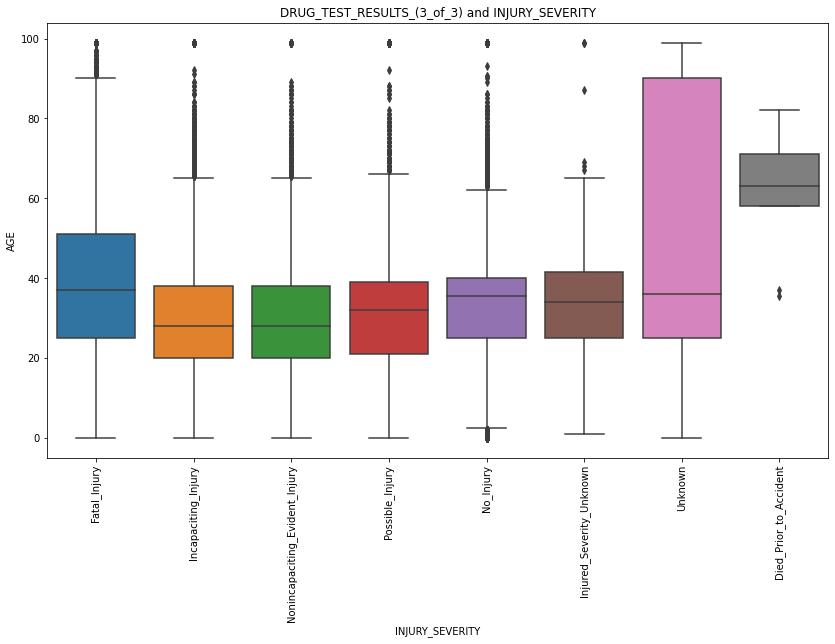

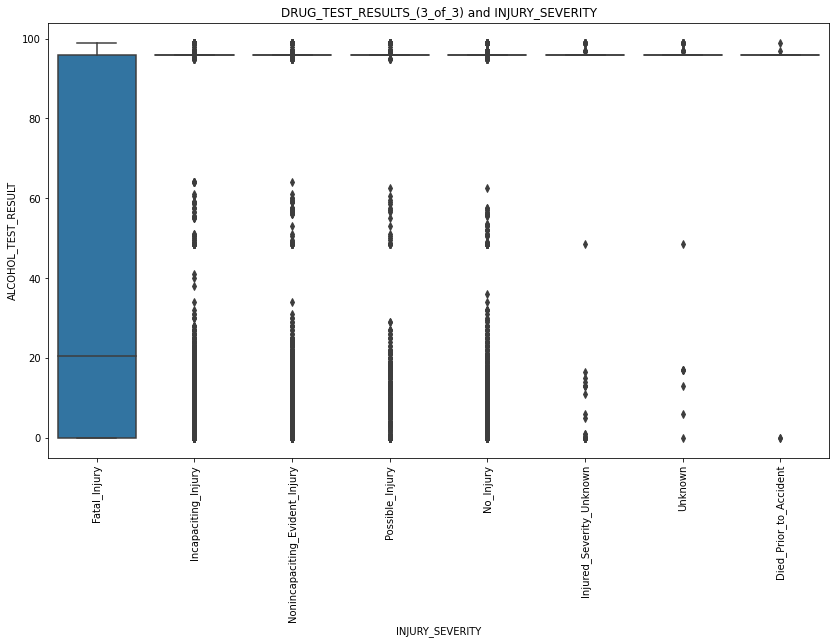

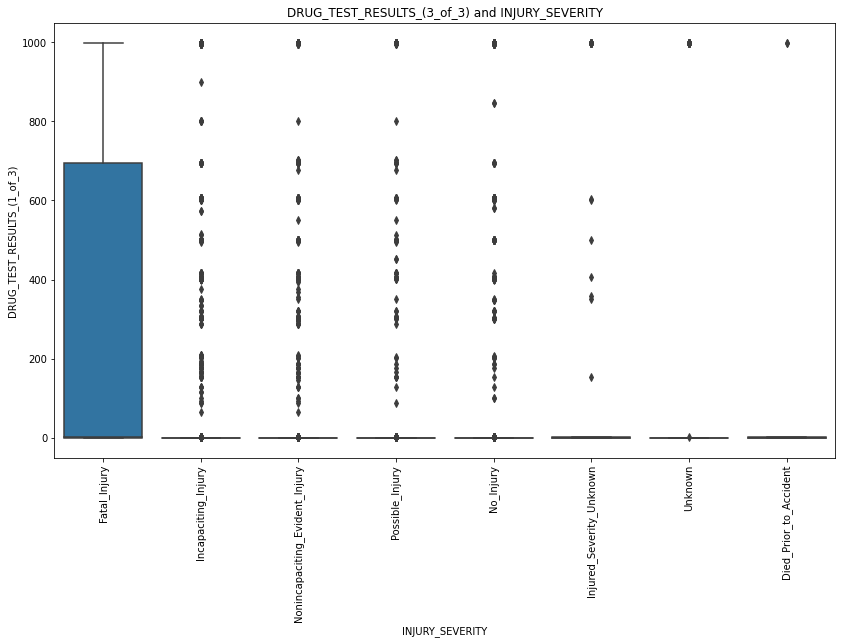

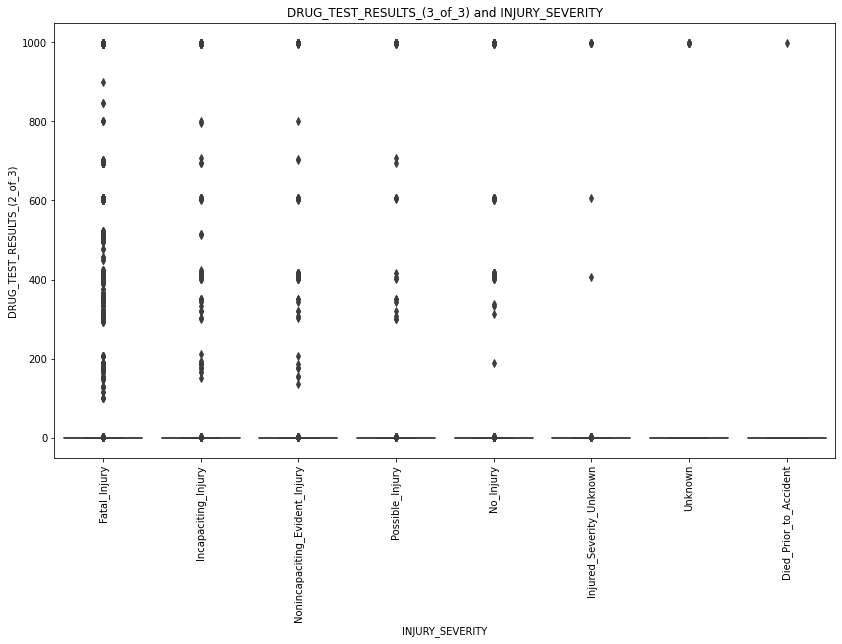

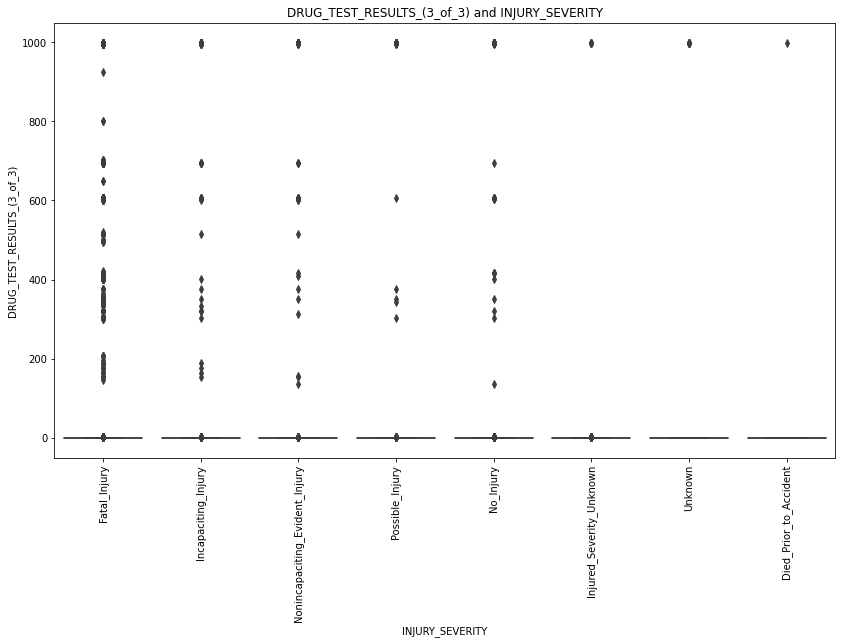

In [15]:
'''
EDA of Numerical Columns
'''

for column in numericalColumns:
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df11, x=targetVariable, y=column)
    plt.title(f"{col} and {targetVariable}")
    plt.xlabel(targetVariable)
    plt.ylabel(column)
    plt.xticks(rotation=90)
    plt.show()


The above box plots displays distribution of numerical variables across different categories of target variable. We can notice that variables like "Age" and "ALCOHOL_TEST_RESULT" might be informative for classification as they have noticable variation, while features with less variation might not be useful for classification algorithms.

<Figure size 504x432 with 0 Axes>

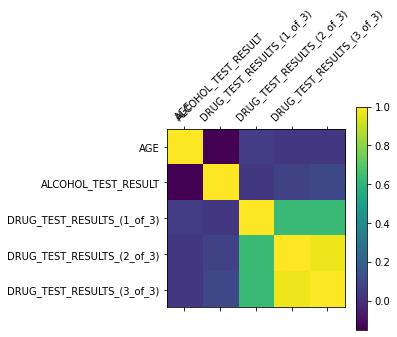

In [16]:
    # Checking correlation between numerical columns
correlationMatrix = df11[numericalColumns].corr()
plt.figure(figsize=(7, 6))
plt.matshow(correlationMatrix)
plt.xticks(range(len(correlationMatrix.columns)), correlationMatrix.columns,rotation=45)
plt.yticks(range(len(correlationMatrix.columns)), correlationMatrix.columns)
plt.colorbar()


Checking correlations between numerical columns will help us identify multicollinearity.
We can then decide which columns might be redundant.

We see that there is a strong correlation between the three drug test columns. So we will remove the 2 drug test columns and just keep 1.


In [17]:
# Removing drug test 2 and 3 and drug test results 2 and 3 

df11.drop(columns=['DRUG_TEST_TYPE_(2_of_3)','DRUG_TEST_TYPE_(3_of_3)','DRUG_TEST_RESULTS_(2_of_3)', 'DRUG_TEST_RESULTS_(3_of_3)'], inplace=True)

# Removing column names from the nonNumerical and numericalColumn lists
nonNumericalColumns.pop(nonNumericalColumns.index('DRUG_TEST_TYPE_(2_of_3)'))
nonNumericalColumns.pop(nonNumericalColumns.index('DRUG_TEST_TYPE_(3_of_3)')) 
numericalColumns.pop(numericalColumns.index('DRUG_TEST_RESULTS_(2_of_3)'))
numericalColumns.pop(numericalColumns.index('DRUG_TEST_RESULTS_(3_of_3)'))

'DRUG_TEST_RESULTS_(3_of_3)'

From the box plot we can notice that the numerical columns are in different scales. It would be better to normalize the numerical column to a common scale as it is more suitable for classification algorithms

In [18]:
'''
Normalization of Numerical Columns
'''

scaler = StandardScaler()

# Fit and transform the numerical columns
df11[numericalColumns] = scaler.fit_transform(df11[numericalColumns])

# Verifying the results
print(df11[numericalColumns].describe())
df11.head(2)

                AGE  ALCOHOL_TEST_RESULT  DRUG_TEST_RESULTS_(1_of_3)
count  9.529300e+04         9.529300e+04                9.529300e+04
mean   7.456400e-17         6.203725e-17                6.442330e-17
std    1.000005e+00         1.000005e+00                1.000005e+00
min   -2.092010e+00        -1.575243e+00               -5.179979e-01
25%   -7.380599e-01        -1.269934e+00               -5.179979e-01
50%   -4.604115e-02         6.793464e-01               -5.179979e-01
75%    4.955388e-01         6.793464e-01               -5.154469e-01
max    3.865369e+00         7.498023e-01                2.030386e+00


,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,AIR_BAG_AVAILABILITY/DEPLOYMENT,EJECTION,EJECTION_PATH,EXTRICATION,...,METHOD_OF_DRUG_DETERMINATION,DRUG_TEST_TYPE_(1_of_3),DRUG_TEST_RESULTS_(1_of_3),HISPANIC_ORIGIN,TAKEN_TO_HOSPITAL,RELATED_FACTOR_(1)-PERSON_LEVEL,RELATED_FACTOR_(2)-PERSON_LEVEL,RELATED_FACTOR_(3)-PERSON_LEVEL,RACE,INJURY_SEVERITY
0,Alabama,-0.046041,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Air_Bag_Available_but_Not_Deployed_for_this_Seat,Totally_Ejected,Unknown_category,Not_Extricated,...,Not_Reported,Unknown_if_Tested_for_Drugs,2.030386,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury
1,Alabama,0.856592,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Deployed_Air_Bag_from_Front,Totally_Ejected,Unknown_category,Not_Extricated,...,Not_Reported,Not_Tested_for_Drugs,-0.517998,Non-Hispanic,No,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,Not_Applicable_-_Driver/None_-_All_Other_Persons,White,Fatal_Injury


##### 1.1.1.3) Target Variable

Class Distribution (%):
INJURY_SEVERITY
Fatal_Injury                      42.325249
No_Injury                         19.890233
Incapaciting_Injury               15.119684
Nonincapaciting_Evident_Injury    13.842570
Possible_Injury                    8.463371
Injured_Severity_Unknown           0.201484
Unknown                            0.147965
Died_Prior_to_Accident             0.009445
Name: proportion, dtype: float64


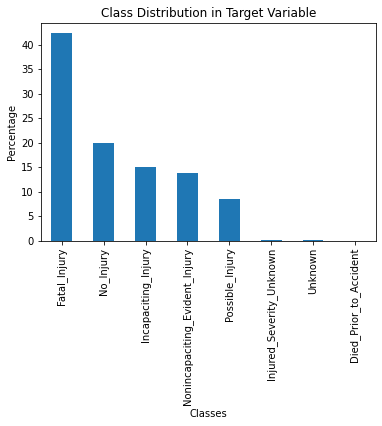

In [19]:
'''
EDA of Target Variable
'''
# Checking class distribution
class_distribution = df11[targetVariable].value_counts(normalize=True) * 100

# Printing class distribution
print("Class Distribution (%):")
print(class_distribution)

#plotting class distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution in Target Variable')
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()



From the above table and bar chart we notice that class distribution is imbalanced, where 'Fatal_Injury' class has the highest occurance. This will be an issue when using classification as the model will be trained to be biased, We need to look for a way to balance the class distribution when training the model. 

We also notice that the last four classes have very less data points, it would be benificial to group them as "Other". This would reduce the imbalance slightly and reduce load on class balancing methods that we will need to apply later.

In [20]:
# Grouping the last 4 categories into "Other"

# Creating a list of column names to be grouped
smallTargetCategories = ['Injured_Severity_Unknown', 'Unknown', 'Died_Prior_to_Accident','Possible_Injury']

# Replacing the specified categories with "Other" in the target column
df11[targetVariable] = df11[targetVariable].replace(smallTargetCategories, 'Other')

# Verifying the distribution after grouping
updatedDistribution = df11[targetVariable].value_counts(normalize=True) * 100
print("Updated Distribution:\n", updatedDistribution)


Updated Distribution:
 INJURY_SEVERITY
Fatal_Injury                      42.325249
No_Injury                         19.890233
Incapaciting_Injury               15.119684
Nonincapaciting_Evident_Injury    13.842570
Other                              8.822264
Name: proportion, dtype: float64


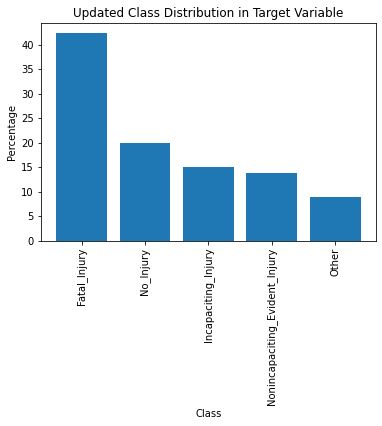

In [21]:
#Plotting bar chart of the updated distribution
plt.bar(updatedDistribution.index, updatedDistribution.values)
plt.title('Updated Class Distribution in Target Variable')
plt.ylabel('Percentage')
plt.xlabel('Class')
plt.xticks(rotation=90)
plt.show()

Now the above distribution will slightly reduce the load on class imbalance correction techniques that we will be applying later.

#### 1.1.2) Feature Encoding and Selection

##### 1.1.2.1) Feature Encoding

In [22]:
'''
Feature encoding
'''
# Defining the feature encoder for categorical variables
featureEncoder11= ColumnTransformer(
    transformers=[
        ('numerical', 'passthrough', numericalColumns),
        ('categorical', OneHotEncoder(handle_unknown='ignore'), nonNumericalColumns)
    ],
    remainder='drop'
)

# Fitting the feature encoder to the data
X11 = df11.drop(columns=[targetVariable])
y11 = df11[targetVariable]

# Transform the data
XEncoded11 = featureEncoder11.fit_transform(X11)

# Feature names after encoding
encodedFeatureNames11 = (
    numericalColumns +
    list(featureEncoder11.named_transformers_['categorical'].get_feature_names_out(nonNumericalColumns))
)
print("Categorical Features encoded. Numerical features passed through as noramlization has been done in previous cells")

Categorical Features encoded. Numerical features passed through as noramlization has been done in previous cells


For classification algorithms to perform effectively, feature encoding is necessary to transform categorical data into a numerical format. Here we are not transforming numerical columns as they have already been normalised using `standardscalar()`.

We are using oneHotEncoder() to encode because it represents the data as binary vectors, while preserving information.

##### 1.1.2.2) Feature Selection

In [23]:
"""
Feature Selection using Random Forest
"""
# Initializing Random Forest model
rfFeatureSelection11 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rfFeatureSelection11.fit(XEncoded11, y11)

# Use SelectFromModel for feature selection
selector = SelectFromModel(rfFeatureSelection11, threshold="median")
xSelected11 = selector.transform(XEncoded11)

# Get selected feature names
selectedFeatures11 = [encodedFeatureNames11[i] for i in range(len(encodedFeatureNames11)) if selector.get_support()[i]]

print("Selected Features:")
print(selectedFeatures11)

Selected Features:
['AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)', 'CASE_STATE_Alabama', 'CASE_STATE_California', 'CASE_STATE_Florida', 'CASE_STATE_Georgia', 'CASE_STATE_Indiana', 'CASE_STATE_Louisiana', 'CASE_STATE_Maryland', 'CASE_STATE_Michigan', 'CASE_STATE_New_Jersey', 'CASE_STATE_North_Carolina', 'CASE_STATE_Ohio', 'CASE_STATE_Other', 'CASE_STATE_Pennsylvania', 'CASE_STATE_Tennessee', 'CASE_STATE_Texas', 'CASE_STATE_Virginia', 'SEX_Female', 'SEX_Male', 'PERSON_TYPE_Driver', 'SEATING_POSITION_Front_Seat_-_Left_Side_(Drivers_Side)', 'SEATING_POSITION_Front_Seat_-_Right_Side', 'SEATING_POSITION_Other', 'SEATING_POSITION_Other_Passenger_in_enclosed_passenger_or_cargo_area', 'SEATING_POSITION_Second_Seat_-_Left_Side', 'SEATING_POSITION_Second_Seat_-_Middle', 'SEATING_POSITION_Second_Seat_-_Right_Side', 'RESTRAINT_SYSTEM-USE_Lap_Belt', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'RESTRAINT_SYSTEM-USE_Unknown_category', 'AI

The above code uses the Random Forest algorithm to select significant features as we have 29 features, helping us to reduce dimensionality and improve model efficiency without reducing performance.

The choice of using Random Forest for selecting features is made because it evaluates feature importance by analyzing how much each feature contributes to improving the model's predictive accuracy.

The potential issue is that Random Forest feature selection may be biased towards high-cardinality features or those with more categories during one-hot encoding. However, we have grouped low-frequency categories and reduced cardinality as much as we can, which helps in minimizing the bias as much as possible.

In [24]:
# Initializing Stratified K-Fold and SMOTE
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=myStudentNumber)
smote = SMOTE(random_state=myStudentNumber)

#### 1.1.3) Decision Tree Classifier

We will be implementing the decision tree classifier as our first model as it is relatively faster to train and easy to interpret, making it a good starting point. They are less likely to overfit when used with hyperparameter tuning.

As we saw from the Target variable EDA, the output class is heavily imbalanced, hence we will be using Synthetic Minority Oversampling Technique(SMOTE) to address the class imbalance.

As the parameter grid is relatively small, we will be using grid search instead of random search to tune the hyperparameters as there is a chance that random search might miss the optimal combination.

The hyperparameters for tuning have been chosen with a focus on controlling the tree's complexity, impacting overfitting and model interpretability. These particular values are chosen as they are commonly used and impactful hyperparameters for decision tree classifiers.

After experimenting with different values like k=5 and 10, k=3 for fold split provides the best balance between computational efficiency and good evaluation.

These are the metrics that we will be using to evaluate the model
- Accuracy  
- Precision
- Recall (Sensitivity)  
- F1-Score  
- Confusion Matrix  
- AUC-ROC Score  
- ROC Curve


Accuracy gives an overall measure but can be misleading for imbalanced datasets. Precision and recall measure false positives and negatives, F1-score balances them for uneven classes. The confusion matrix gives a good idea about prediction details, and the AUC-ROC score quantifies the model's ability to differentiate between classes. With these metrics, we will be able to evaluate the model comprehensively and choose the best model out of 4 pipelines.

##### Note:
This is the general process followed in each pipeline for evaluating and tuning  all 4 machine learning pipelines.

The pipeline begins by defining a parameter grid for hyperparameter tuning specific to the chosen model. 
The dataset is split into training and testing sets for cross-validation, ensuring quality model evaluation.
To handle class imbalance in the training data, SMOTE (Synthetic Minority Oversampling Technique) is applied to create a balanced dataset.


GridSearchCV is then used to perform hyperparameter tuning, optimizing the model's performance based on the scoring metric. 

The best model from each fold is used to make predictions on the test set, and performance metrics such as AUC-ROC and accuracy are calculated and stored for cross-validation analysis. The final fold's best model is used for generating ROC curves and other visualizations to evaluate model performance for each class.

Since the same steps are applied across all pipelines, the detailed explanations for next pipelines are avoided for reducing redundency.

The main differences between the pipelines are in the models and hyperparameter grids used. The initial hyperparameter values for all models were chosen based on commonly used ranges, and then by experimentation to fine-tune and optimize performance.

In [ ]:
# Defining the parameter grid for the decision tree classifier

paramGrid11 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],  
    'max_features': [None, 'sqrt', 'log2'],  
    'ccp_alpha': [0.0, 0.01, 0.1],  
}

# Creating some lists to store metrics
cvScores11 = []
models11 = []
predictions11 = []
actualLabels11 = []
probabilities11 = []

# Iterating through each fold
for trainIndex11, testIndex11 in kf.split(xSelected11, y11):
    # Splitting data for this fold
    xTrain11, xTest11 = xSelected11[trainIndex11], xSelected11[testIndex11]
    yTrain11, yTest11 = y11[trainIndex11], y11[testIndex11]

    # Applying SMOTE to training data
    xTrainResampled11, yTrainResampled11 = smote.fit_resample(xTrain11, yTrain11)
    
    # Defining DecisionTreeClassifier
    decisionTreeClassifier11 = DecisionTreeClassifier(random_state=myStudentNumber)
    
    # Setting up GridSearchCV
    gridSearch11 = GridSearchCV(
        estimator=decisionTreeClassifier11,
        param_grid=paramGrid11,
        scoring='roc_auc_ovr',  # Using AUC (using one vs rest statergy as this is a multiclass problem)
        cv=3,
        n_jobs=-1
    )
    
    # Fitting the grid search on the resampled training data
    gridSearch11.fit(xTrainResampled11, yTrainResampled11)
    
    # Retrieving the best estimator
    bestDecisionTreeClassifier11 = gridSearch11.best_estimator_
    
    # Predicting on the original test set
    yPred11 = bestDecisionTreeClassifier11.predict(xTest11)
    yPredProbabilities11 = bestDecisionTreeClassifier11.predict_proba(xTest11)  # Probabilities for all classes
    
    # Storing predictions and actual labels
    predictions11.extend(yPred11)
    actualLabels11.extend(yTest11)
    probabilities11.extend(yPredProbabilities11)  


    # Calculatin AUC-ROC score
    aucScore11 = roc_auc_score(yTest11, yPredProbabilities11, multi_class='ovr')  
    cvScores11.append({'AUC': aucScore11})

    # Calculating Accuracy scores
    testScore11 = bestDecisionTreeClassifier11.score(xTest11, yTest11)
    cvScores11.append({'Accuracy': testScore11})
    models11.append(bestDecisionTreeClassifier11)

    # Printing classification report and scores
    print("Classification Report for this fold:")
    print("Best Parameters:", gridSearch11.best_params_)
    print(classification_report(yTest11, yPred11, zero_division=0))
    print("AUC-ROC Score for this fold:",end=" ")
    print(aucScore11)
    print("Accuracy Score for this fold:",end=" ") 
    print(testScore11)
    print("x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x")
    print("")

# Calculating and printing average cross-validation scores
averageAUC11 = np.mean([score['AUC'] for score in cvScores11 if 'AUC' in score])
averageAccuracy11 = np.mean([score['Accuracy'] for score in cvScores11 if 'Accuracy' in score])

print(f"\nAverage CV AUC-ROC Score: {averageAUC11:.4f}")
print(f"\nAverage CV Accuracy Score: {averageAccuracy11:.4f}")


# Using the best model from the last fold. This will be used for calculating ROC curve and conf matrix
bestModel11 = models11[-1]
yTestFinal11 = actualLabels11[-len(yTest11):] 
yProbaFinal11 = probabilities11[-len(yTest11):] 

# Making sure the best probability array is a NumPy array for slicing
yProbaFinal11 = np.array(probabilities11[-len(yTestFinal11):]) 

# Calculating One-vs-Rest for each class
fpr11 = {}
tpr11 = {}


for i, classLabel11 in enumerate(bestModel11.classes_):
    binaryYTest11 = np.array([1 if label == classLabel11 else 0 for label in yTestFinal11])
    fpr11[classLabel11], tpr11[classLabel11], _ = roc_curve(binaryYTest11, yProbaFinal11[:, i])  

# Plotting the AUC-ROC curve
plt.figure(figsize=(10, 8))
for classLabel11 in bestModel11.classes_:
    plt.plot(fpr11[classLabel11], tpr11[classLabel11], label=f"Class {classLabel11}")

# Plotting diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random")

# Adding labels, title, and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Best Decision Tree Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


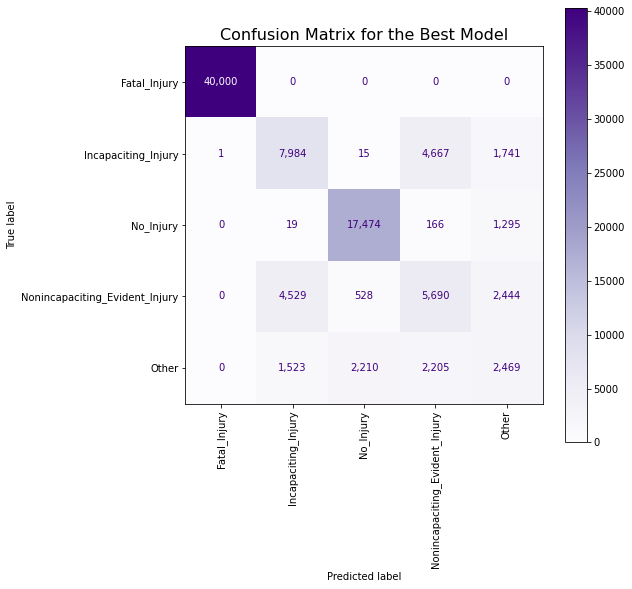

In [25]:
"""
Displaying metrics
"""


# Aggregating true labels and predictions from all folds
yTrueAll11 = np.array(actualLabels11)  # True labels from all folds
yPredAll11 = np.array([pred for pred in predictions11])  # Predictions stored during cross-validation

# Compute the confusion matrix
confMatrix11 = confusion_matrix(yTrueAll11, yPredAll11)

# Display the confusion matrix
disp11 = ConfusionMatrixDisplay(confusion_matrix=confMatrix11, display_labels=np.unique(y11))

# Customize the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Increase the plot size
disp11.plot(cmap=plt.cm.Purples, ax=ax)  # Use a different color map
plt.title("Confusion Matrix for the Best Model", fontsize=16)  # Adjust title font size

# Rotate x-axis labels
plt.xticks(rotation=90)

# Format numbers on the heatmap as integers
for text in disp11.text_.ravel():
    text.set_text(f"{int(float(text.get_text())):,}")  # Format numbers with commas (e.g., 40,000)

plt.show()


### **1.2) Pipeline 2**

For this pipeline, we will be exploring Support Vector Machine (SVM) with an RBF kernel. As SVM with radial basis function is a computationally expensive model and due to hardware limitations of the system this code is written on, we need to look for ways to either reduce dimensions or the size of the dataset to make the training process feasible. Converting all the input features into different principal components to capture maximum variance using Principal Component Analysis (PCA) is one way to reduce dimensions. But this compromises the model interpretability as we will no longer have original features. The second approach of reducing the dataset size without losing representativeness looks like a good option. This is where systematic sampling comes in, as it allows us to select a representative subset of the data while maintaining the distribution which results in not compromising the predictive performance of classification models.

For this pipeling we will be using the cleaned and normalized dataframe `df11` from pipeline to maintain consistancy and avoid redundant computations

#### 1.2.1) Systematic Sampling

In [26]:
""" 
Doing systematic Sampling of the dataset
"""

# Sorting the DataFrame by index to ensure consistent sampling
dfSorted12 = df11.sort_index()

# Systematic sampling with a step of 5
sampledDf12 = dfSorted12.iloc[::5]

# Ensuring minimum representation of each class
classCounts12 = sampledDf12[targetVariable].value_counts()
minClassCount12 = classCounts12.min()

# Supplementing with random samples if needed
supplementedDfs12 = []
for classLabel12 in classCounts12.index:
    classDf12 = sampledDf12[sampledDf12[targetVariable] == classLabel12]
    if len(classDf12) < minClassCount12:
        additionalSamples12 = df11[df11[targetVariable] == classLabel12].sample(
            n=minClassCount12 - len(classDf12)
        )
        supplementedDfs12.append(pd.concat([classDf12, additionalSamples12]))
    else:
        supplementedDfs12.append(classDf12)

# Concatenating the supplemented DataFrames
df12 = pd.concat(supplementedDfs12).reset_index(drop=True)

# Displaying the shape of the sampled DataFrame
df12.shape


(19059, 26)

The above code does systematic sampling to reduce the size of the dataset while maintaining representativeness. It selects every 5th record from the sorted dataset and supplements with random samples for underrepresented classes. This ensures all classes of the target variable have equal representation. This approach preserves the diversity of the distribution of the target variable, making it suitable for classification models.

We can notice that the dataset after sampling has 19,059 rows. The number 5 was chosen for sampling as the original dataset had around 100k records, and selecting every 5th record provides a manageable dataset size. Now we can use the dataframe `df12` for feature encoding, selection and model training

#### 1.2.2) Feature Encoding and Selection

In [27]:
'''
Feature Encoding
'''

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numericalColumns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), nonNumericalColumns)
    ],
    remainder='drop'
)

# Fit the preprocessor to the data
X12 = df12.drop(columns=['INJURY_SEVERITY'])
y12 = df12['INJURY_SEVERITY']

# Transforming the data
XEncoded12 = preprocessor.fit_transform(X12)

# Feature names after encoding
encoded_feature_names = (
    numericalColumns +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(nonNumericalColumns))
)

print(f"Encoded feature names: {encoded_feature_names}")


Encoded feature names: ['AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)', 'CASE_STATE_Alabama', 'CASE_STATE_Arizona', 'CASE_STATE_Arkansas', 'CASE_STATE_California', 'CASE_STATE_Colorado', 'CASE_STATE_Florida', 'CASE_STATE_Georgia', 'CASE_STATE_Illinois', 'CASE_STATE_Indiana', 'CASE_STATE_Kansas', 'CASE_STATE_Kentucky', 'CASE_STATE_Louisiana', 'CASE_STATE_Maryland', 'CASE_STATE_Michigan', 'CASE_STATE_Minnesota', 'CASE_STATE_Mississippi', 'CASE_STATE_Missouri', 'CASE_STATE_New_Jersey', 'CASE_STATE_New_Mexico', 'CASE_STATE_New_York', 'CASE_STATE_North_Carolina', 'CASE_STATE_Ohio', 'CASE_STATE_Oklahoma', 'CASE_STATE_Oregon', 'CASE_STATE_Other', 'CASE_STATE_Pennsylvania', 'CASE_STATE_South_Carolina', 'CASE_STATE_Tennessee', 'CASE_STATE_Texas', 'CASE_STATE_Virginia', 'CASE_STATE_Washington', 'CASE_STATE_Wisconsin', 'SEX_Female', 'SEX_Male', 'PERSON_TYPE_Driver', 'PERSON_TYPE_Other', 'PERSON_TYPE_Passenger_of_a_Motor_Vehicle_in_Transport', 'PERSON_TYPE_Pedestrian', 'SEATING_POSITIO

In [28]:
"""
Feature Selection
"""
# Initialize the Random Forest model
rfModel12 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rfModel12.fit(XEncoded12, y12)

# Use SelectFromModel for feature selection
selector12 = SelectFromModel(rfModel12, threshold="median")
xSelected12 = selector.transform(XEncoded12)

# Get selected feature names
selectedSeatures12 = [encoded_feature_names[i] for i in range(len(encoded_feature_names)) if selector.get_support()[i]]

print(f"Selected Features: {selectedSeatures12}")


Selected Features: ['AGE', 'ALCOHOL_TEST_RESULT', 'DRUG_TEST_RESULTS_(1_of_3)', 'CASE_STATE_Alabama', 'CASE_STATE_California', 'CASE_STATE_Florida', 'CASE_STATE_Georgia', 'CASE_STATE_Indiana', 'CASE_STATE_Louisiana', 'CASE_STATE_Maryland', 'CASE_STATE_Michigan', 'CASE_STATE_New_Jersey', 'CASE_STATE_North_Carolina', 'CASE_STATE_Ohio', 'CASE_STATE_Other', 'CASE_STATE_Pennsylvania', 'CASE_STATE_Tennessee', 'CASE_STATE_Texas', 'CASE_STATE_Virginia', 'SEX_Female', 'SEX_Male', 'PERSON_TYPE_Driver', 'SEATING_POSITION_Front_Seat_-_Left_Side_(Drivers_Side)', 'SEATING_POSITION_Front_Seat_-_Right_Side', 'SEATING_POSITION_Other', 'SEATING_POSITION_Other_Passenger_in_enclosed_passenger_or_cargo_area', 'SEATING_POSITION_Second_Seat_-_Left_Side', 'SEATING_POSITION_Second_Seat_-_Middle', 'SEATING_POSITION_Second_Seat_-_Right_Side', 'RESTRAINT_SYSTEM-USE_Lap_Belt', 'RESTRAINT_SYSTEM-USE_Lap_and_Shoulder_Belt', 'RESTRAINT_SYSTEM-USE_None_Used/Not_Applicable', 'RESTRAINT_SYSTEM-USE_Unknown_category', 'AI

##### 1.2.3) Support Vector Classifier

Classification Report for this fold:
Best Parameters: {'C': 1, 'gamma': 'scale'}
                                precision    recall  f1-score   support

                  Fatal_Injury       1.00      1.00      1.00      2712
           Incapaciting_Injury       0.60      0.50      0.55       935
                     No_Injury       0.86      0.94      0.90      1259
Nonincapaciting_Evident_Injury       0.46      0.52      0.49       895
                         Other       0.33      0.28      0.30       552

                      accuracy                           0.78      6353
                     macro avg       0.65      0.65      0.65      6353
                  weighted avg       0.78      0.78      0.78      6353

AUC-ROC Score for this fold: 0.9265115201661329
Accuracy Score for this fold: 0.7840390366755864
x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Classification Report for this fold:
Best Parameters: {'C': 1, 'gamma': 'scale'}
                 

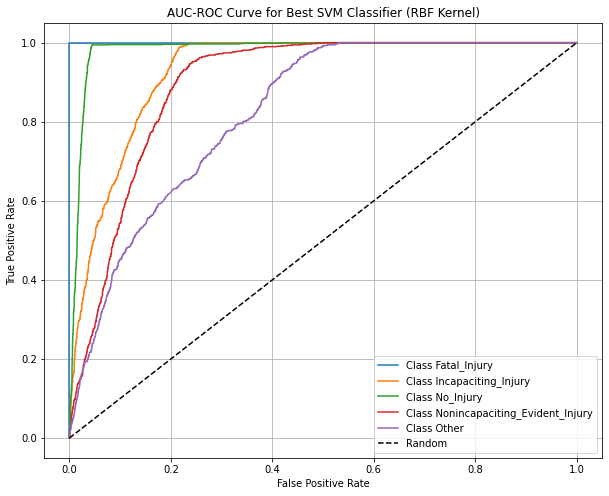

In [29]:
# Defining the parameter grid for SVM with RBF kernel
paramGrid12 = {
    'C': [0.01, 0.1, 1], 
    'gamma': ['scale','auto'] 
}

# Creating some lists to store metrics
cvScores12 = []
models12 = []
predictions12 = []
actualLabels12 = []
probabilities12 = []

# Iterating through each fold
for trainIndex12, testIndex12 in kf.split(xSelected12, y12):
    # Splitting data for this fold
    xTrain12, xTest12 = xSelected12[trainIndex12], xSelected12[testIndex12]
    yTrain12, yTest12 = y12[trainIndex12], y12[testIndex12]

    # Applying SMOTE to training data
    xTrainResampled12, yTrainResampled12 = smote.fit_resample(xTrain12, yTrain12)
    
    # Defining SVM with RBF kernel
    svmClassifier12 = SVC(kernel='rbf', probability=True, random_state=myStudentNumber)
    
    # Setting up GridSearchCV
    gridSearch12 = GridSearchCV(
        estimator=svmClassifier12,
        param_grid=paramGrid12,
        scoring='roc_auc_ovr',  # Using AUC (using one vs rest statergy as this is a multiclass problem)
        cv=3,
        n_jobs=-1
    )
    
    # Fitting the grid search on the resampled training data
    gridSearch12.fit(xTrainResampled12, yTrainResampled12)
    
    # Retrieving the best estimator
    bestSVMClassifier12 = gridSearch12.best_estimator_
    
    # Predicting on the original test set
    yPred12 = bestSVMClassifier12.predict(xTest12)
    yPredProbabilities12 = bestSVMClassifier12.predict_proba(xTest12)  # Probabilities for all classes
    
    # Storing predictions and actual labels
    predictions12.extend(yPred12)
    actualLabels12.extend(yTest12)
    probabilities12.extend(yPredProbabilities12)  # Append full probabilities

    # Calculating AUC-ROC score
    aucScore12 = roc_auc_score(yTest12, yPredProbabilities12, multi_class='ovr')  # Full probabilities
    cvScores12.append({'AUC': aucScore12})

    # Calculating Accuracy scores
    testScore12 = bestSVMClassifier12.score(xTest12, yTest12)
    cvScores12.append({'Accuracy': testScore12})
    models12.append(bestSVMClassifier12)

    # Printing classification report and scores
    print("Classification Report for this fold:")
    print("Best Parameters:", gridSearch12.best_params_)
    print(classification_report(yTest12, yPred12, zero_division=0))
    print("AUC-ROC Score for this fold:", end=" ")
    print(aucScore12)
    print("Accuracy Score for this fold:", end=" ")
    print(testScore12)
    print("x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x")
    print("")

# Calculating and printing average cross-validation scores
averageAUC12 = np.mean([score['AUC'] for score in cvScores12 if 'AUC' in score])
averageAccuracy12 = np.mean([score['Accuracy'] for score in cvScores12 if 'Accuracy' in score])

print(f"\nAverage CV AUC-ROC Score: {averageAUC12:.4f}")
print(f"\nAverage CV Accuracy Score: {averageAccuracy12:.4f}")

# Using the best model from the last fold. This will be used for calculating ROC curve and conf matrix
bestModel12 = models12[-1]
yTestFinal12 = actualLabels12[-len(yTest12):]  
yProbaFinal12 = probabilities12[-len(yTest12):]  

# Making sure the best probability array is a NumPy array for slicing
yProbaFinal12 = np.array(probabilities12[-len(yTestFinal12):]) 

# Calculating One-vs-Rest for each class
fpr12 = {}
tpr12 = {}

for i, classLabel12 in enumerate(bestModel12.classes_):
    binaryYTest12 = np.array([1 if label == classLabel12 else 0 for label in yTestFinal12])
    fpr12[classLabel12], tpr12[classLabel12], _ = roc_curve(binaryYTest12, yProbaFinal12[:, i])  

# Plotting the AUC-ROC curve
plt.figure(figsize=(10, 8))
for classLabel12 in bestModel12.classes_:
    plt.plot(fpr12[classLabel12], tpr12[classLabel12], label=f"Class {classLabel12}")

# Plotting diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random")

# Adding labels, title, and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Best SVM Classifier (RBF Kernel)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


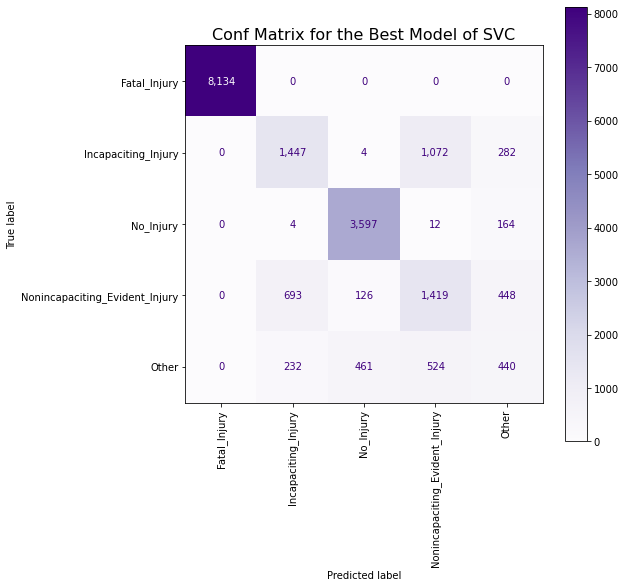

In [30]:
"""
Displaying metrics
"""


# Aggregating true labels and predictions from all folds
yTrueAll12 = np.array(actualLabels12)  # True labels from all folds
yPredAll12 = np.array([pred for pred in predictions12])  # Predictions stored during cross-validation

# Compute the confusion matrix
confMatrix12 = confusion_matrix(yTrueAll12, yPredAll12)

# Display the confusion matrix
disp12 = ConfusionMatrixDisplay(confusion_matrix=confMatrix12, display_labels=np.unique(y12))

# Customize the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Increase the plot size
disp12.plot(cmap=plt.cm.Purples, ax=ax)  # Use a different color map
plt.title("Conf Matrix for the Best Model of SVC", fontsize=16)  # Adjust title font size

# Rotate x-axis labels
plt.xticks(rotation=90)

# Format numbers on the heatmap as integers
for text in disp12.text_.ravel():
    text.set_text(f"{int(float(text.get_text())):,}") 

plt.show()


#### 1.3) Pipeline 3

For this pipeline, the same systamatic sampled, feature encoded and selected dataset from the pipeline 2 is reused to avoid redundancy. Moreover running Random Forest on the entire dataset would be computationally expensive due to its ensemble nature and large feature set, so using the preprocessed subset ensures efficiency while maintaining a representative dataset for training.

##### 1.3.1) Random Forest Classifier

Classification Report for this fold:
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
                                precision    recall  f1-score   support

                  Fatal_Injury       1.00      1.00      1.00      2483
           Incapaciting_Injury       0.62      0.59      0.61       982
                     No_Injury       0.86      0.97      0.91      1419
Nonincapaciting_Evident_Injury       0.46      0.44      0.45       895
                         Other       0.35      0.30      0.32       574

                      accuracy                           0.79      6353
                     macro avg       0.66      0.66      0.66      6353
                  weighted avg       0.78      0.79      0.78      6353

AUC-ROC Score for this fold: 0.9100773481467727
Accuracy Score for this fold: 0.7878167794742641
x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Classificatio

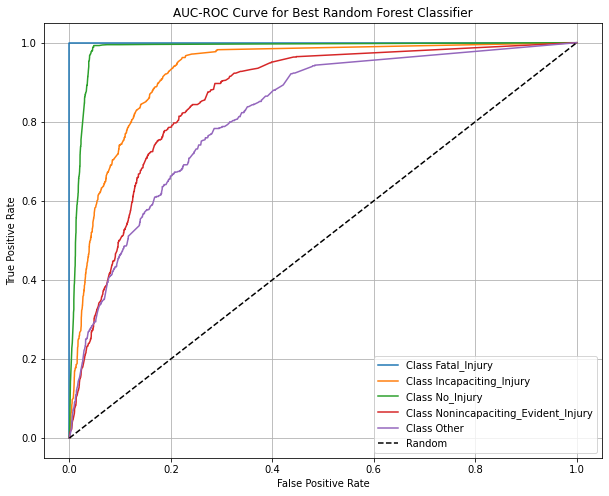

In [31]:
# Defining the parameter grid for the Random Forest classifier
paramGrid13 = { 
    'n_estimators': [50, 100, 200],       
    'max_depth': [None, 10, 20],          
    'min_samples_split': [2, 5],           
    'min_samples_leaf': [1, 2],            
    'max_features': ['sqrt', 'log2'],      
}

# Creating some lists to store metrics
cvScores13 = []
models13 = []
predictions13 = []
actualLabels13 = []
probabilities13 = []

# Iterating through each fold
for trainIndex13, testIndex13 in kf.split(xSelected12, y12):
    # Splitting data for this fold
    xTrain13, xTest13 = xSelected12[trainIndex13], xSelected11[testIndex13]
    yTrain13, yTest13 = y12[trainIndex13], y11[testIndex13]

    # Apply SMOTE to training data
    xTrainResampled13, yTrainResampled13 = smote.fit_resample(xTrain13, yTrain13)
    
    # Define RandomForestClassifier
    randomForestClassifier13 = RandomForestClassifier(random_state=myStudentNumber)
    
    # Set up GridSearchCV
    gridSearch13 = GridSearchCV(
        estimator=randomForestClassifier13,
        param_grid=paramGrid13,
        scoring='roc_auc_ovr',  # Using AUC (using one vs rest statergy as this is a multiclass problem)
        cv=3,
        n_jobs=-1
    )
    
    # Fitting the grid search on the resampled training data
    gridSearch13.fit(xTrainResampled13, yTrainResampled13)
    
    # Retrieving the best estimator
    bestRandomForestClassifier13 = gridSearch13.best_estimator_
    
    # Predicting on the original test set
    yPred13 = bestRandomForestClassifier13.predict(xTest13)
    yPredProbabilities13 = bestRandomForestClassifier13.predict_proba(xTest13)  # Probabilities for all classes
    
    # Storing predictions and actual labels
    predictions13.extend(yPred13)
    actualLabels13.extend(yTest13)
    probabilities13.extend(yPredProbabilities13)  # Append full probabilities

    # Calculating AUC-ROC score
    aucScore13 = roc_auc_score(yTest13, yPredProbabilities13, multi_class='ovr')  # Full probabilities
    cvScores13.append({'AUC': aucScore13})

    # Calculating Accuracy scores
    testScore13 = bestRandomForestClassifier13.score(xTest13, yTest13)
    cvScores13.append({'Accuracy': testScore13})
    models13.append(bestRandomForestClassifier13)

    # Printing classification report and scores
    print("Classification Report for this fold:")
    print("Best Parameters:", gridSearch13.best_params_)
    print(classification_report(yTest13, yPred13, zero_division=0))
    print("AUC-ROC Score for this fold:", end=" ")
    print(aucScore13)
    print("Accuracy Score for this fold:", end=" ") 
    print(testScore13)
    print("x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x")
    print("")

# Calculating and printing average cross-validation scores
averageAUC13 = np.mean([score['AUC'] for score in cvScores13 if 'AUC' in score])
averageAccuracy13 = np.mean([score['Accuracy'] for score in cvScores13 if 'Accuracy' in score])

print(f"\nAverage CV AUC-ROC Score: {averageAUC13:.4f}")
print(f"\nAverage CV Accuracy Score: {averageAccuracy13:.4f}")


# Use the best model from the last fold
bestModel13 = models13[-1]
yTestFinal13 = actualLabels13[-len(yTest13):]  # Last fold's true labels
yProbaFinal13 = probabilities13[-len(yTest13):]  # Last fold's predicted probabilities

# Making sure the best probability array is a NumPy array for slicing
yProbaFinal13 = np.array(probabilities13[-len(yTestFinal13):]) 

# Calculating One-vs-Rest for each class
fpr13 = {}
tpr13 = {}

for i, classLabel13 in enumerate(bestModel13.classes_):
    binaryYTest13 = np.array([1 if label == classLabel13 else 0 for label in yTestFinal13])
    fpr13[classLabel13], tpr13[classLabel13], _ = roc_curve(binaryYTest13, yProbaFinal13[:, i])  

# Plotting the AUC-ROC curve
plt.figure(figsize=(10, 8))
for classLabel13 in bestModel13.classes_:
    plt.plot(fpr13[classLabel13], tpr13[classLabel13], label=f"Class {classLabel13}")

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random")

# Add labels, title, and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Best Random Forest Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


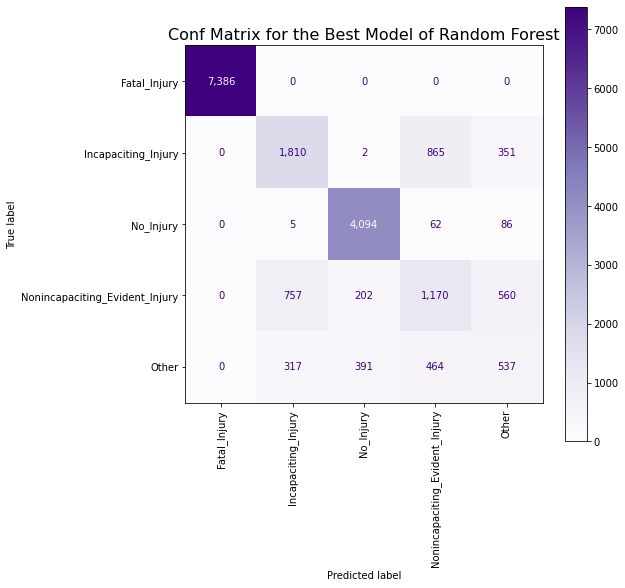

In [32]:
"""
Displaying metrics
"""

# Aggregating true labels and predictions from all folds
yTrueAll13 = np.array(actualLabels13)  # True labels from all folds
yPredAll13 = np.array([pred for pred in predictions13])  # Predictions stored during cross-validation

# Compute the confusion matrix
confMatrix13 = confusion_matrix(yTrueAll13, yPredAll13)

# Display the confusion matrix
disp13 = ConfusionMatrixDisplay(confusion_matrix=confMatrix13, display_labels=np.unique(y12))

# Customize the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Increase the plot size
disp13.plot(cmap=plt.cm.Purples, ax=ax)  # Use a different color map
plt.title("Conf Matrix for the Best Model of Random Forest", fontsize=16)  # Adjust title font size

# Rotate x-axis labels
plt.xticks(rotation=90)

# Format numbers on the heatmap as integers
for text in disp13.text_.ravel():
    text.set_text(f"{int(float(text.get_text())):,}")  # Format numbers with commas (e.g., 40,000)

plt.show()


#### 1.4) Pipeline 4

Also for this pipeline, the same dataset used in pipeline 2 and 3 is being used to avoid redundancy and to maintain consistancy. 

##### 1.4.1) KNN Classifier

Classification Report for this fold:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2712
           1       0.49      0.53      0.51       935
           2       0.85      0.87      0.86      1259
           3       0.40      0.38      0.39       895
           4       0.24      0.23      0.23       552

    accuracy                           0.74      6353
   macro avg       0.59      0.60      0.60      6353
weighted avg       0.74      0.74      0.74      6353

AUC-ROC Score for this fold: 0.8413937259533529
Accuracy Score for this fold: 0.7416968361404062
x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Classification Report for this fold:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     

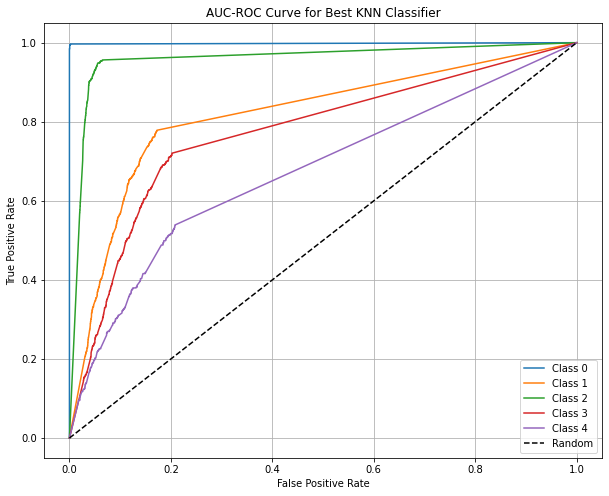

In [33]:
# Defining the parameter grid for the KNN classifier
paramGrid14 = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Creating some lists to store metrics
cvScores14 = []
models14 = []
predictions14 = []
actualLabels14 = []
probabilities14 = []

labelEncoder = LabelEncoder()

# Fitting and transforming the target labels as KNN needs numeric target variables
yEncoded = labelEncoder.fit_transform(y12)

# Iterating through each fold
for trainIndex14, testIndex14 in kf.split(xSelected12, yEncoded):
    # Splitting data for this fold
    xTrain14, xTest14 = xSelected12[trainIndex14], xSelected12[testIndex14]
    yTrain14, yTest14 = yEncoded[trainIndex14], yEncoded[testIndex14]

    # Apply SMOTE to training data
    xTrainResampled14, yTrainResampled14 = smote.fit_resample(xTrain14, yTrain14)
    
    # Define KNeighborsClassifier
    knnClassifier14 = KNeighborsClassifier()
    
    # Set up GridSearchCV
    gridSearch14 = GridSearchCV(
        estimator=knnClassifier14,
        param_grid=paramGrid14,
        scoring='roc_auc_ovr',  # Using AUC (using one vs rest statergy as this is a multiclass problem)
        cv=3,
        # n_jobs=-1 #using all cores for KNN is crashing the system
    )
    
    # Fitting the grid search on the resampled training data
    gridSearch14.fit(xTrainResampled14, yTrainResampled14)
    
    # Retrieving the best estimator
    bestKNNClassifier14 = gridSearch14.best_estimator_
    
    # Predicting on the original test set
    yPred14 = bestKNNClassifier14.predict(xTest14)
    yPredProbabilities14 = bestKNNClassifier14.predict_proba(xTest14)  # Probabilities for all classes
    
    # Storing predictions and actual labels
    predictions14.extend(yPred14)
    actualLabels14.extend(yTest14)
    probabilities14.extend(yPredProbabilities14)  # Append full probabilities

    # Calculating AUC-ROC score
    aucScore14 = roc_auc_score(yTest14, yPredProbabilities14, multi_class='ovr')  # Full probabilities
    cvScores14.append({'AUC': aucScore14})

    # Calculating Accuracy scores
    testScore14 = bestKNNClassifier14.score(xTest14, yTest14)
    cvScores14.append({'Accuracy': testScore14})
    models14.append(bestKNNClassifier14)

    # Printing classification report and scores
    print("Classification Report for this fold:")
    print("Best Parameters:", gridSearch14.best_params_)
    print(classification_report(yTest14, yPred14, zero_division=0))
    print("AUC-ROC Score for this fold:", end=" ")
    print(aucScore14)
    print("Accuracy Score for this fold:", end=" ") 
    print(testScore14)
    print("x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x")
    print("")

# Calculating and printing average cross-validation scores
averageAUC14 = np.mean([score['AUC'] for score in cvScores14 if 'AUC' in score])
averageAccuracy14 = np.mean([score['Accuracy'] for score in cvScores14 if 'Accuracy' in score])

print(f"\nAverage CV AUC-ROC Score: {averageAUC14:.4f}")
print(f"\nAverage CV Accuracy Score: {averageAccuracy14:.4f}")


# Use the best model from the last fold
bestModel14 = models14[-1]
yTestFinal14 = actualLabels14[-len(yTest14):]  # Last fold's true labels
yProbaFinal14 = probabilities14[-len(yTest14):]  # Last fold's predicted probabilities

# Making sure the best probability array is a NumPy array for slicing
yProbaFinal14 = np.array(probabilities14[-len(yTestFinal14):]) 

# Calculating One-vs-Rest for each class
fpr14 = {}
tpr14 = {}

for i, classLabel14 in enumerate(bestModel14.classes_):
    binaryYTest14 = np.array([1 if label == classLabel14 else 0 for label in yTestFinal14])
    fpr14[classLabel14], tpr14[classLabel14], _ = roc_curve(binaryYTest14, yProbaFinal14[:, i])  

# Plotting the AUC-ROC curve
plt.figure(figsize=(10, 8))
for classLabel14 in bestModel14.classes_:
    plt.plot(fpr14[classLabel14], tpr14[classLabel14], label=f"Class {classLabel14}")

# Diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random")

# Add labels, title, and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Best KNN Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()


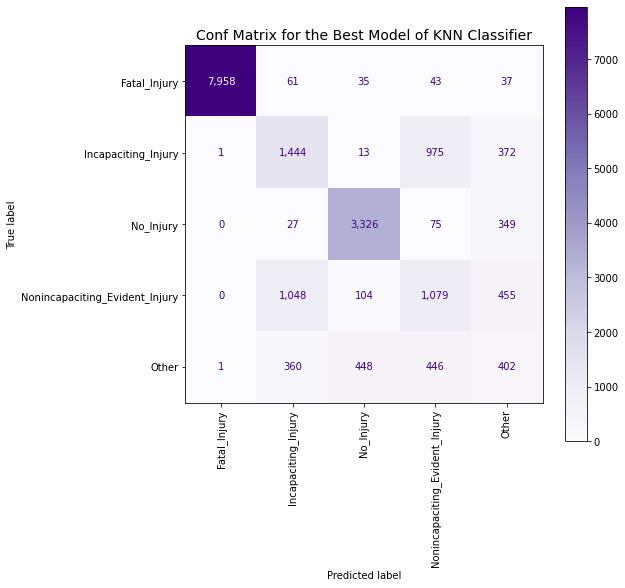

In [34]:
"""
Displaying metrics
"""

# Aggregating true labels and predictions from all folds
yTrueAll14 = np.array(actualLabels14)  # True labels from all folds
yPredAll14 = np.array([pred for pred in predictions14])  # Predictions stored during cross-validation

# Compute the confusion matrix
confMatrix14 = confusion_matrix(yTrueAll14, yPredAll14)

# Display the confusion matrix
disp14 = ConfusionMatrixDisplay(confusion_matrix=confMatrix14, display_labels=np.unique(y12))

# Customize the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Increase the plot size
disp14.plot(cmap=plt.cm.Purples, ax=ax)  # Use a different color map
plt.title("Conf Matrix for the Best Model of KNN Classifier", fontsize=14)  # Adjust title font size

# Rotate x-axis labels
plt.xticks(rotation=90)

# Format numbers on the heatmap as integers
for text in disp14.text_.ravel():
    text.set_text(f"{int(float(text.get_text())):,}")  # Format numbers with commas (e.g., 40,000)

plt.show()


In [35]:
""" 
A table comparing all models' metrics
"""


# Createing a dictionary to hold the metrics for each pipeline
modelMetrics = {
    "Model": ["Decision Tree", "SVM (RBF)", "Random Forest", "KNN"],
    "Accuracy": [averageAccuracy11, averageAccuracy12, averageAccuracy13, averageAccuracy14],
    "AUC-ROC": [averageAUC11, averageAUC12, averageAUC13, averageAUC14],
    "F1-Score": [ 
        classification_report(yTrueAll11, yPredAll11, output_dict=True)['weighted avg']['f1-score'],
        classification_report(yTrueAll12, yPredAll12, output_dict=True)['weighted avg']['f1-score'],
        classification_report(yTrueAll13, yPredAll13, output_dict=True)['weighted avg']['f1-score'],
        classification_report(yTrueAll14, yPredAll14, output_dict=True)['weighted avg']['f1-score']
    ]
}

# Converting the dictionary to a DataFrame
metricsTable = pd.DataFrame(modelMetrics)

# Displaing the table
print(metricsTable)

           Model  Accuracy   AUC-ROC  F1-Score
0  Decision Tree  0.776028  0.889235  0.772896
1      SVM (RBF)  0.788971  0.926025  0.783568
2  Random Forest  0.786872  0.913187  0.781495
3            KNN  0.745527  0.842142  0.745882


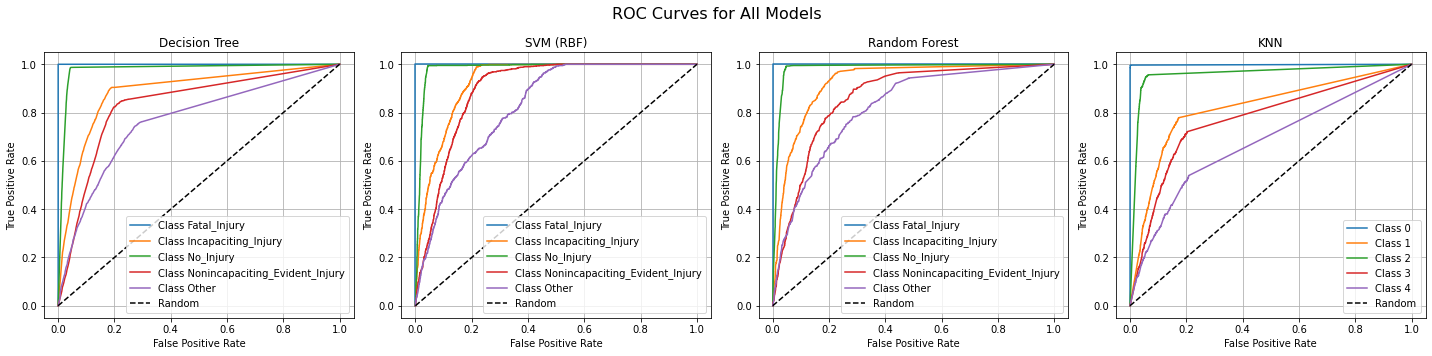

In [36]:
# Creating a figure for side-by-side ROC curve plots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))  
fig.suptitle("ROC Curves for All Models", fontsize=16)

# Model names for titles
modelNames = ["Decision Tree", "SVM (RBF)", "Random Forest", "KNN"]

# Data for plotting
fprList = [fpr11, fpr12, fpr13, fpr14]
tprList = [tpr11, tpr12, tpr13, tpr14]
bestModels = [bestModel11, bestModel12, bestModel13, bestModel14]

# Iterating over models and plots of ROC curves
for i, ax in enumerate(axes):
    ax.set_title(modelNames[i])
    for classLabel in bestModels[i].classes_:
        ax.plot(fprList[i][classLabel], tprList[i][classLabel], label=f"Class {classLabel}")
    ax.plot([0, 1], [0, 1], 'k--', label="Random")  # Random guessing diagonal
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")
    ax.grid()

plt.tight_layout()
plt.show()

#### 1.5) **Conclusion and Discussion**

All the confusion matrix follows a similar trend. The model performs exceptionally well in predicting the "Fatal_Injury" with minimum error. However the misclassifications gets bigger and bigger as it progresses to minority classes. 

Based on the above figures and summary table, we observe that SVM(RBF) has the highest accuracy (0.789) and AUC-ROC (0.92) score, indicating better overall performance across different classes and showing a strong ability to differentiate between classes. The F1 score is also high for SVM compared to other models, indicating a good balance between precision and recall. The Random Forest model also performs well, but SVM outperforms it in accuracy and F1 score, making it the best model.

But no model is perfect. Here are some limitations of the methods that we have implemented:
- Despite using SMOTE, all models struggle with minority classes, which suggests the need for advanced techniques for handling imbalance.
- We have used Random Forest for feature selection on one-hot encoded values. This might have introduced bias as the model tends to give high cardinality variables more importance. This could lead to unimportant features being selected.
- We have trained 3 models on a reduced dataset because of computational limitations. The models may give better results if they were trained on the full dataset.

Future Improvements
- Advanced handling of class imbalance would improve models' minority class prediction.
- Using recursive feature elimination would benefit the process of selecting the most important features while being computationally expensive.
- As mentioned before, training on the full dataset will help models capture all patterns.

By implementing these methods, we can improve the models' overall performance and robustness.

Reference  material for systematic sampling: https://www.investopedia.com/terms/s/systematic-sampling.asp

---
---
# 2) Regression



In [ ]:
""" 
Data Import and basic information
"""
# Naming convention: part 2, parent dataset- df2
df2 = pd.read_csv("./fitting-results.csv") 

#Getting basic information like dimension and datatype infomation 
dimension = df2.shape 
print(f"Dataframe has {dimension[0]} rows and {dimension[1]} columns")


print("\nBasic information about the DataFrame abd the data types:")
print(df2.info())


Dataframe has 19992 rows and 9 columns

Basic information about the DataFrame abd the data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n_cyanos  19992 non-null  int64  
 1   co2       19992 non-null  float64
 2   light     19992 non-null  float64
 3   SucRatio  19992 non-null  float64
 4   Nsample   19992 non-null  int64  
 5   a         19992 non-null  float64
 6   mu        19992 non-null  float64
 7   tau       19992 non-null  float64
 8   a0        19992 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.4 MB
None


#### 2.1) Exploratory Data Analysis and Data Normalization

In [38]:
#Storing column names in a list for easy access
features = df2.columns[:5].tolist()
targets = df2.columns[-4::].tolist()

In [39]:
"""
Data Quality Check
"""
# Checking null values
print("missing Values")
print(df2.isnull().sum())

# Checking duplicate values
print("\nTotal number of duplicates:")
print(df2.duplicated().sum())

missing Values
n_cyanos    0
co2         0
light       0
SucRatio    0
Nsample     0
a           0
mu          0
tau         0
a0          0
dtype: int64

Total number of duplicates:
0


In [40]:
"""
Statistical Analysis
"""
# The below code give us basic summary statistics
print(df2.describe())


extendedSummay= []

for feature in df2.columns:
    column = {
        "Column": feature,
        "Range": df2[feature].max() - df2[feature].min(),
        "IQR": df2[feature].quantile(0.75) - df2[feature].quantile(0.25),
    }
    extendedSummay.append(column)
    
# Display the table

print(pd.DataFrame(extendedSummay).T)

           n_cyanos           co2         light      SucRatio       Nsample  \
count  19992.000000  19992.000000  19992.000000  19992.000000  19992.000000   
mean     494.367547     49.890457      0.495162      0.496075   9997.371349   
std      288.957886     29.138328      0.289767      0.289731   5772.058433   
min        2.000000      0.001000      0.000001      0.000000      1.000000   
25%      242.000000     24.415472      0.234114      0.240803   4998.750000   
50%      499.000000     49.833278      0.494984      0.494983   9997.500000   
75%      740.000000     75.251084      0.742475      0.742475  14995.250000   
max     1000.000000    100.000000      1.000000      1.000000  19995.000000   

                  a            mu            tau            a0  
count  19992.000000  19992.000000   1.999200e+04  19992.000000  
mean       5.490172      5.634110   3.731908e-01      0.991562  
std       13.441047      9.862259   4.211606e-01      0.017142  
min        0.000004      0.0

The dataset shows considrable variablilty in both input and target variables, with inputs like n_cyanos and co2 spanning broad ranges, while inputs like light and sucRatio look more normalized. The taget variables show significant diversity, mainly a and mu show high variability, a0 has tight clustering around 1. This variablitiy in the dataset makes it essential to carefully explore the feature relationships before regression modelling.

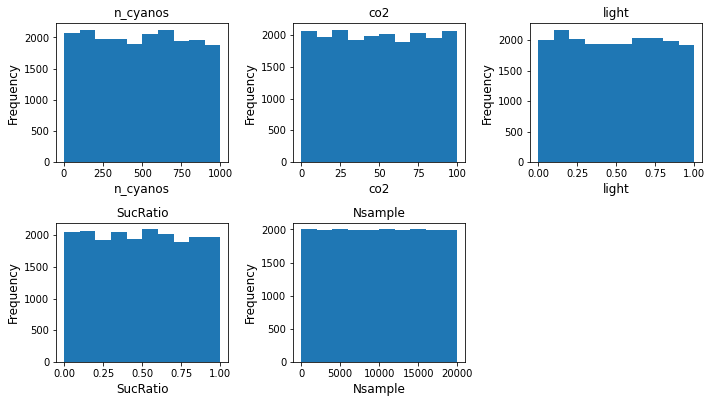

In [41]:
"""
Distribution Check of the input varibles
"""

plt.figure(figsize=(10, 8))
i=1
for feature in features:
    plt.subplot(3,3,i)
    plt.hist(df2[feature])
    plt.title(feature)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    i+=1
    
plt.tight_layout()
plt.show()


The histograms tells us about the distribution of the input variables, most variables are evenly spread and the last input variable, experiment number shows uniform spread and serves as an identifier and not as a meaniningful input variable. Adding nsample would likly increase the noise and hence removing it before proceeding any further.

In [42]:
df2 = df2.drop('Nsample',axis=1)
features.pop(features.index("Nsample"))

'Nsample'

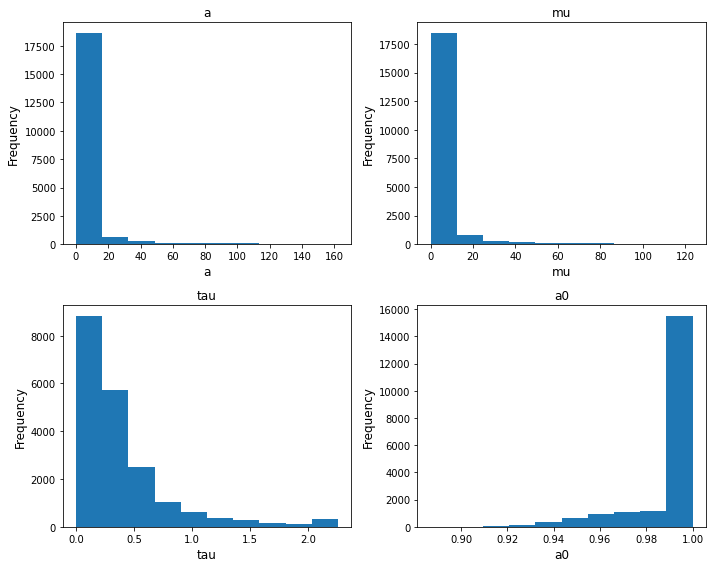

In [43]:
"""
Distribution Check of the output varibles
"""

plt.figure(figsize=(10, 8))
i=1
for target in targets:
    plt.subplot(2, 2, i)  
    plt.hist(df2[target])
    plt.title(target)
    plt.xlabel(target, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    i+=1
    
plt.tight_layout()
plt.show()


The histogram of target varibles show skewed distributions for a, mu and tau, indicating presence of non linear trends. The variable a0 is clustered around 1.0 as noted from statistical analysis.

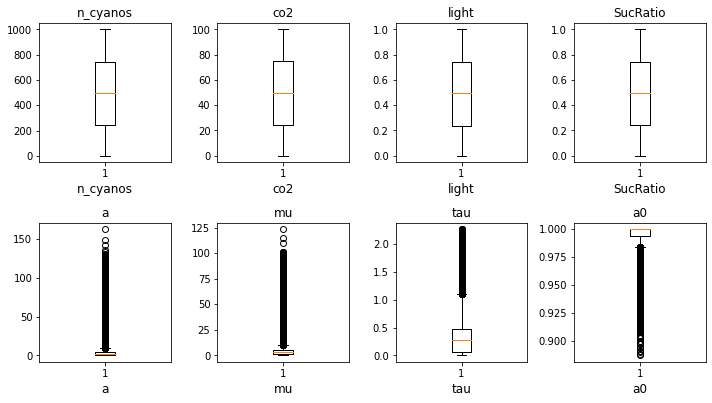

In [44]:
plt.figure(figsize=(10, 8))
i = 1
for column in (features + targets):
    plt.subplot(3, 4, i)
    plt.boxplot(df2[column])
    plt.title(column, fontsize=12)
    plt.xlabel(column, fontsize=12)
    i += 1

plt.tight_layout()
plt.show()




As noted earlier, the box plot confirms that the input variables are evenly distributed while the target variables exhibit outliers.

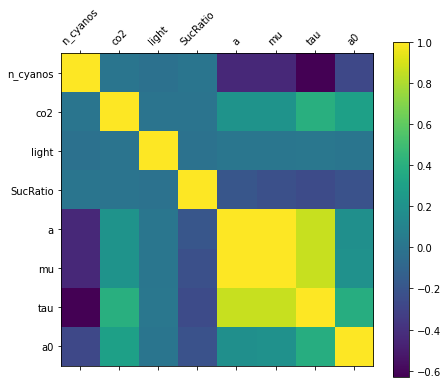

In [45]:
"""
Correlation Analysis
"""
correlationMatrix = df2[features+targets].corr()

plt.figure(figsize=(7, 6))
plt.matshow(correlationMatrix, fignum=1)
plt.xticks(range(len(correlationMatrix.columns)), correlationMatrix.columns,rotation=45)
plt.yticks(range(len(correlationMatrix.columns)), correlationMatrix.columns)
plt.colorbar()

We can observe that all the target variables are correlated, but as stated in the project brief, we would be removing other target variables when dealing with one target variable, so this should not be a problem.

#### 2.2) Target Variable "a"

In [46]:
df21 = df2.copy()

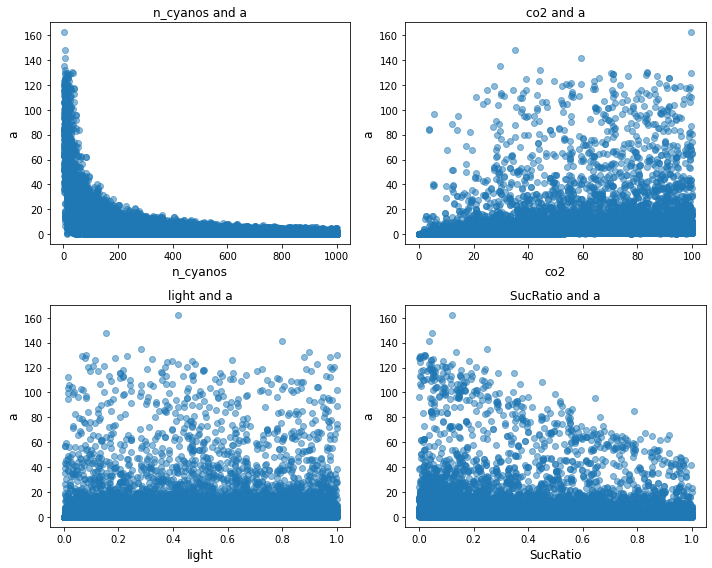

In [47]:
"""
Feature Relationship
"""

plt.figure(figsize=(10, 8))
i = 1
for feature in features:
    plt.subplot(2, 2, i)  
    plt.scatter(df21[feature], df21[targets[0]], alpha=0.5)
    plt.title(f"{feature} and {targets[0]}", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(target[0], fontsize=12)
    i += 1  

plt.tight_layout()
plt.show()


The above plots show a good non-linear inverse relationship between "n_cyanos" and "a" and a negative trend between SucRatio and "a", suggesting these as key predictors. In contrast, co2 and light show no clear trends with "a", indicating they might be weaker predictiors. Log transforming "n_cyanos" will linearize the relationship which help the models in making good predictions

In [48]:
""" 
Log transformation of n_cyanos
"""
df21['n_cyanos']=np.log(df21['n_cyanos'])


The same test, train and validation split will be used in all 4 pipelines for modelling target variable "a"

In [49]:
""" 
Test train split
"""

scaler = StandardScaler()
X1 = df21[features]
# targets[0] is a
y1 = df21[targets[0]]

# Splitting data into training and testing sets
XTrain1, XTest1, yTrain1, yTest1 = train_test_split(
    X1, y1, 
    test_size=0.20, 
    random_state=myStudentNumber,
    shuffle=True
)

# Splitting training data into train and validation sets
XTrain1, XValidation1, yTrain1, yValidation1 = train_test_split(
    XTrain1, yTrain1, 
    test_size=0.25,
    random_state=myStudentNumber, 
    shuffle=True
)


 Since the data set has around ~20 thousand samples, the size is sufficient enough that we can avoid stratified sampling and proceed with random splitting. The above approach of two-step splitting splits the dataset into 3 sets- Train(60%), Test(20%) and Validation(20%) providing sufficient samples for each step for model training, hyperparameter tuning and final evaluation.

In [50]:
# Initialing  and applying StandardScaler
standardScaler = StandardScaler()
XTrain1 = standardScaler.fit_transform(XTrain1)
XValidation1 = standardScaler.transform(XValidation1)
XTest1 = standardScaler.transform(XTest1)
predictionVariableNames1 = []

The input features are on different scales and for the regression algorithm to find meaningful patterns we need all the features to be normalised. Using standard scalar is more appropriate than MinMax scalar because, all the features are in different scales and standard scalar transforms all features to zero mean and unit variance helping them less sensitive to outliers.

##### 2.2.1) Pipeline 211 - Support Vector Regressor

We have chosen suppoet vector regressor with radial basis function kernal as our first model as it has the ability to handle non linear relationship well. Gamma, epsilon and C are choosen as the parameters for tuning, as these 3 are the most important for controling model's performance.The values are chosen based on the most common ranges used for hyperparameter tuning in SVR models.

In [51]:
#Defining the parameters for the grid search
paramGridSvr1 = {
    'gamma':  [0.001, 0.01, 0.1],  
    'epsilon':[0.1, 0.2, 0.3],
    'C':      [0.1, 1, 10],  
}

# Defining the model
svr1 = SVR(kernel='rbf')

# Defining the GridSearch cross validation object
gridSearchSvr1 = GridSearchCV(
    estimator=svr1, 
    param_grid=paramGridSvr1, 
    scoring='r2', 
    cv=5,
    n_jobs=-1
)

# Training support vector regression on training data along with grid search 
gridSearchSvr1.fit(XTrain1, yTrain1)

# Displaying best parameters and CV score from training
print("Best parameters:", gridSearchSvr1.best_params_)
print("Best CV R^2 score:", gridSearchSvr1.best_score_)

# Getting the best model
bestSVR1 = gridSearchSvr1.best_estimator_

# Validation metrics - for model selection/comparison
valdationPredictionsSvr1 = bestSVR1.predict(XValidation1)
validationMAE1 = mean_absolute_error(yValidation1, valdationPredictionsSvr1)
validationMSE1 = mean_squared_error(yValidation1, valdationPredictionsSvr1)
validationR21 = r2_score(yValidation1, valdationPredictionsSvr1)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAE1:.2f}")
print(f"Validation MSE: {validationMSE1:.2f}")
print(f"Validation R2: {validationR21:.2f}")



# Test metrics - final evaluation
testPredictionsSVR1 = bestSVR1.predict(XTest1)

testMaeSVR1 = mean_absolute_error(yTest1, testPredictionsSVR1)
testMseSVR1 = mean_squared_error(yTest1, testPredictionsSVR1)
testR2SVR1 = r2_score(yTest1, testPredictionsSVR1)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeSVR1:.2f}")
print(f"Test MSE: {testMseSVR1:.2f}")
print(f"Test R2: {testR2SVR1:.2f}")

#For plotting purposes
predictionVariableNames1.append(testPredictionsSVR1)

Best parameters: {'C': 10, 'epsilon': 0.3, 'gamma': 0.1}
Best CV R^2 score: 0.9581292875640297

Validation Metrics:
Validation MAE: 0.57
Validation MSE: 6.72
Validation R2: 0.96

Test Metrics (Final Evaluation):
Test MAE: 0.58
Test MSE: 7.91
Test R2: 0.96


The grid search identified the best parameters mentioned above resulting in a strong cross-validation R2 score of 0.96. The other metrics MAE, MSE show consistant performance, confirming that model generalizes well to unseen data. The low MAE and high R2 gives us confidence about the model's robustness.

##### 2.2.2) Pipeline 212 - Decision Tree Regressor

We have chosen a Decision Tree Regressor as our second model because to its interpretability and ability to capture well definied relationships in the data. The parameters max_depth, min_samples_split, min_samples_leaf, and criterion were selected for tuning, as they play a important role in controlling the tree's complexity and performance. The values for these parameters are chosen to cover a wide range, ensuring flexibility for accurate predictions.

In [52]:

# Define a parameter grid for the Decision Tree
paramGridDTree1 = {
    'max_depth': [5, 10, 15, 20, 30,35,40,100,200],      
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 5],        
    'criterion': ['squared_error', 'friedman_mse'] 
}

# Defining the model
DTree1 = DecisionTreeRegressor(random_state=myStudentNumber)

# Setting up GridSearch
gridSearchDTree1 = GridSearchCV(
    estimator=DTree1,
    param_grid=paramGridDTree1,
    scoring='r2',       
    cv=5,               
    n_jobs=-1           
)

gridSearchDTree1.fit(XTrain1, yTrain1)

# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchDTree1.best_params_)
print("Best CV R^2 score:", gridSearchDTree1.best_score_)

# Getting the best model
bestDTree1 = gridSearchDTree1.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsDTree1 = bestDTree1.predict(XValidation1)
validationMAEDTree1= mean_absolute_error(yValidation1, valdationPredictionsDTree1)
validationMSEDTree1 = mean_squared_error(yValidation1, valdationPredictionsDTree1)
validationR2DTree1 = r2_score(yValidation1, valdationPredictionsDTree1)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAEDTree1:.2f}")
print(f"Validation MSE: {validationMSEDTree1:.2f}")
print(f"Validation R2: {validationR2DTree1:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsDTree1 = bestDTree1.predict(XTest1)
testMaeDTree1 = mean_absolute_error(yTest1, testPredictionsDTree1)
testMseDTree1 = mean_squared_error(yTest1, testPredictionsDTree1)
testR2DTree1 = r2_score(yTest1, testPredictionsDTree1)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeDTree1:.2f}")
print(f"Test MSE: {testMseDTree1:.2f}")
print(f"Test R2: {testR2DTree1:.2f}")

#For plotting purposes
predictionVariableNames1.append(testPredictionsDTree1)


Best parameters: {'criterion': 'friedman_mse', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV R^2 score: 0.9482965897329384

Validation Metrics:
Validation MAE: 0.77
Validation MSE: 7.88
Validation R2: 0.95

Test Metrics (Final Evaluation):
Test MAE: 0.72
Test MSE: 8.59
Test R2: 0.95


The grid search  identified the best parameters metioned above getting a good cross-validation R2 score of 0.95. Though this is a bit lesser than our first model SVR, this model still achieves a good MAE and MSE score.

##### 2.2.3) Pipeline 213 - Random Forest Regressor 

Our next model is Random Forest Regressor. The parameters n_estimators, max_depth, min_samples_split, and min_samples_leaf were selected as they are important in controlling  overall performance.

In [53]:


# Define a parameter grid for the Random Forest
paramGridRf1 = {
    'n_estimators': [50, 100, 200],     
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Instantiate the model
rf1 = RandomForestRegressor(random_state=myStudentNumber)

# Set up GridSearch for Random Forest
gridSearchRf1 = GridSearchCV(
    estimator=rf1,
    param_grid=paramGridRf1,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the grid search on the training data
gridSearchRf1.fit(XTrain1, yTrain1)


# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchRf1.best_params_)
print("Best CV R^2 score:", gridSearchRf1.best_score_)

# Getting the best model
bestRf1 = gridSearchRf1.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsRf1 = bestRf1.predict(XValidation1)
validationMAERf1 = mean_absolute_error(yValidation1, valdationPredictionsRf1)
validationMSERf1 = mean_squared_error(yValidation1, valdationPredictionsRf1)
validationR2Rf1 = r2_score(yValidation1, valdationPredictionsRf1)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAERf1:.2f}")
print(f"Validation MSE: {validationMSERf1:.2f}")
print(f"Validation R2: {validationR2Rf1:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsRf1 = bestRf1.predict(XTest1)
testMaeRf1 = mean_absolute_error(yTest1, testPredictionsRf1)
testMseRf1 = mean_squared_error(yTest1, testPredictionsRf1)
testR2DRf1 = r2_score(yTest1, testPredictionsRf1)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeRf1:.2f}")
print(f"Test MSE: {testMseRf1:.2f}")
print(f"Test R2: {testR2DRf1:.2f}")


#For plotting purposes
predictionVariableNames1.append(testPredictionsRf1)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R^2 score: 0.9748024282013985

Validation Metrics:
Validation MAE: 0.39
Validation MSE: 3.31
Validation R2: 0.98

Test Metrics (Final Evaluation):
Test MAE: 0.37
Test MSE: 2.78
Test R2: 0.98


The Random Forest Regressor has achieved a very good cross-validation R² score of 0.97. It is better than both the Decision Tree Regressor and the Support Vector Regressor in terms of validation and test metrics. The Random Forest has the lowest MAE (Validation: 0.39, Test: 0.37) and MSE (Validation: 3.31, Test: 2.78), as well as the highest R2 (Validation: 0.98, Test: 0.98), indicating better generalization. Compared to the Decision Tree, Random Forest significantly reduced overfitting, and it has provided better predictions than the SVR, which had a bit more errors and lower R2.

##### 2.2.4) Pipeline 214 - Polynomial Regression

Our next model is Polynomial Regression. Degree of the polynomial feature is the hyperparameter selected for tuning, as it plays a very important role in getting the complexity of the model. A range of values for degree is chosen to explore different levels of complexity, ensuring finding the balance between underfitting and overfitting for accurate predictions.

In [54]:
polyRegressionpipeline1 = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('lin_reg', LinearRegression())
])

# Defining the parameter grid
paramGridPolyRegression1 = {
    'poly_features__degree': [1,2,3,4,5,6,7,8,9,10]
}

# Setting up GridSearch
gridSearchPolyRegression1 = GridSearchCV(
    estimator=polyRegressionpipeline1,
    param_grid=paramGridPolyRegression1,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fitting on training data
gridSearchPolyRegression1.fit(XTrain1, yTrain1)

# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchPolyRegression1.best_params_)
print("Best CV R^2 score:", gridSearchPolyRegression1.best_score_)

# Getting the best model
bestPolyRegression1 = gridSearchPolyRegression1.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsPloyRegression1 = bestPolyRegression1.predict(XValidation1)
validationMAEPolyRegression1 = mean_absolute_error(yValidation1, valdationPredictionsPloyRegression1)
validationMSEPolyRegression1 = mean_squared_error(yValidation1, valdationPredictionsPloyRegression1)
validationR2PolyRegression1 = r2_score(yValidation1, valdationPredictionsPloyRegression1)


print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAEPolyRegression1:.2f}")
print(f"Validation MSE: {validationMSEPolyRegression1:.2f}")
print(f"Validation R2: {validationR2PolyRegression1:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsPolyRegresion1 = bestPolyRegression1.predict(XTest1)
testMaeDTreePolyRegresion1 = mean_absolute_error(yTest1, testPredictionsPolyRegresion1)
testMseDTreePolyRegresion1 = mean_squared_error(yTest1, testPredictionsPolyRegresion1)
testR2PolyRegresion1 = r2_score(yTest1, testPredictionsPolyRegresion1)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeDTreePolyRegresion1:.2f}")
print(f"Test MSE: {testMseDTreePolyRegresion1:.2f}")
print(f"Test R2: {testR2PolyRegresion1:.2f}")


#For plotting purposes
predictionVariableNames1.append(testPredictionsPolyRegresion1)

Best parameters: {'poly_features__degree': 6}
Best CV R^2 score: 0.9647218475293744

Validation Metrics:
Validation MAE: 0.91
Validation MSE: 6.35
Validation R2: 0.96

Test Metrics (Final Evaluation):
Test MAE: 0.85
Test MSE: 4.31
Test R2: 0.98


The grid search found the optimal polynomial degree as 6, achieving a good cross-validation R2 score of 0.96. The validation and test metrics tell us that the model performs well, generalizing well to unseen data with minimum error and high prediction accuracy.

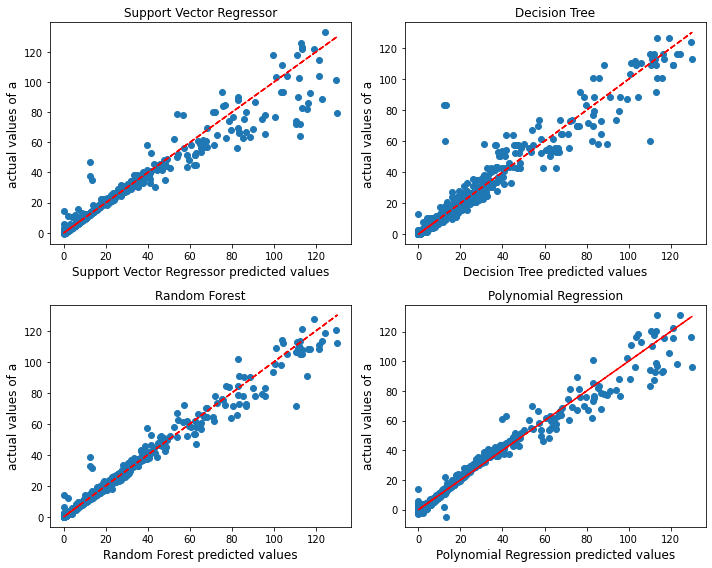

In [55]:
"""
Plotting scatter plots actual values and predicted values for Different Regression Models 
for target variable "a"
"""
# Making it immutable
predictionVariableNames1 = tuple(predictionVariableNames1)
plotTitle1 = ["","Support Vector Regressor","Decision Tree","Random Forest","Polynomial Regression"]


plt.figure(figsize=(10, 8))

i=1
for test in predictionVariableNames1:
    plt.subplot(2, 2, i)  
    plt.scatter(yTest1, test)
    plt.plot(yTest1.values, yTest1.values, label='Ideal Prediction', color='red', linestyle='--')
    plt.title(f"{plotTitle1[i]}", fontsize=12)
    plt.xlabel(f"{plotTitle1[i]} predicted values", fontsize=12)
    plt.ylabel(f"actual values of {targets[0]}", fontsize=12)
    i+=1
plt.tight_layout()
plt.show()

##### 2.2.5) Observation and Conclusion

- The above plots compare the predicted values with the actual values for the four regression models. The closer the points are to the diagonal line, the better the models performance.

- The Random Forest shows the best performance with very less scatter, indicating very good predictions and low error. 

- The Support Vector Regressor also performs well but shows slightly more scatter at higher values, due to underfitting in certain regions. 

- The Decision Tree shows moderate alignment but shows variability and some clustering, may be due to overfitting issues.

- Polynomial Regression demonstrates a good fit, but variability at extreme values tells us that there might be overfitting .

- Overall, Random Forest comes out as the most robust model, followed closely by Support Vector Regression, while the Decision Tree and Polynomial Regression models show a bit of variability in predictions.

#### Note:

- For the next set of target variable pipelines, we will be implementing the same 4 models that we implemented for "a". This is to maintain consistency and ensure a fair comparison of the models' performance across all target variables while maintaining a consistant approach. The steps will also be the same, except the target variables will be different. EDA, normalization, and other preprocessing steps that we have done above will be reused for the next set of target variable pipelines, so redundent code chunks and inline explanation have been omited for simplicity. 

- If any issues arise, re-running the particular target variable pipeline will resolve them.

#### 2.3) Target Variable "mu"

In [56]:
df22 = df2.copy()

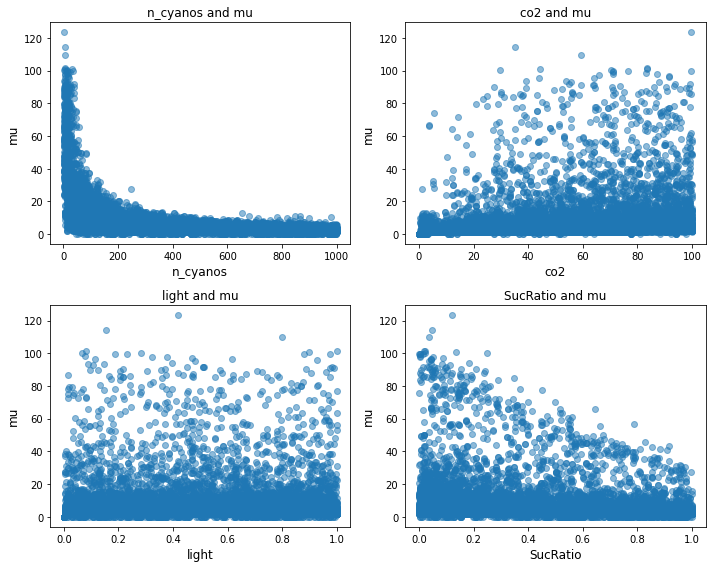

In [57]:
"""
Feature Relationship
"""
# targets[1] = "mu"
plt.figure(figsize=(10, 8))
i = 1
for feature in features:
    plt.subplot(2, 2, i)  
    plt.scatter(df22[feature], df22[targets[1]], alpha=0.5)
    plt.title(f"{feature} and {targets[1]}", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(targets[1], fontsize=12)
    i += 1  

plt.tight_layout()
plt.show()


The above plots show relationship between input and and the target variable "mu". Similar to the first target variable "a", n_cyanos exhibits a strong non-linear inverse relationship, while SucRatio shows a negative trend. Co2 and light display a more dispersed relationship with mu, indicating no clear correlation which was same for a. These suggest that n_cyanos and SucRatio might be the key predictors.

In [58]:
""" 
Log transformation of n_cyanos
"""
df22['n_cyanos']=np.log(df22['n_cyanos'])

In [59]:
""" 
Test train split
"""

scaler = StandardScaler()
X2 = df22[features]
#target[2] is mu
y2 = df22[targets[1]]

# Splitting data into training and testing sets
XTrain2, XTest2, yTrain2, yTest2 = train_test_split(
    X2, y2, 
    test_size=0.20, 
    random_state=myStudentNumber,
    shuffle=True
)

# Splitting training data into train and validation sets
XTrain2, XValidation2, yTrain2, yValidation2 = train_test_split(
    XTrain2, yTrain2, 
    test_size=0.25,
    random_state=myStudentNumber, 
    shuffle=True
)


In [60]:
# Initialing  and applying StandardScaler
XTrain2 = standardScaler.fit_transform(XTrain2)
XValidation2 = standardScaler.transform(XValidation2)
XTest2 = standardScaler.transform(XTest2)
predictionVariableNames2 = []

##### 2.3.1) Pipeline 221 - Support Vector Regressor

In [61]:
#Defining the parameters for the grid search
paramGridSVR2 = {
    'gamma':  [0.001, 0.01, 0.1], 
    'epsilon':[0.1, 0.2, 0.3], 
    'C':      [0.1, 1, 10], 
}

# Defining the model
svr2 = SVR(kernel='rbf')

# Defining the GridSearch cross validation object
gridSearchSVR2 = GridSearchCV(
    estimator=svr2, 
    param_grid=paramGridSVR2, 
    scoring='r2', 
    cv=5,
    n_jobs=-1
)

# Training support vector regression on training data along with grid search 
gridSearchSVR2.fit(XTrain2, yTrain2)

# Display best parameters and CV score from training
print("Best parameters:", gridSearchSVR2.best_params_)
print("Best CV R^2 score:", gridSearchSVR2.best_score_)

# Getting the best model
bestSVR2 = gridSearchSVR2.best_estimator_

# Validation metrics - for model selection/comparison
valdationPredictionsSvr2 = bestSVR2.predict(XValidation2)
validationMAE2 = mean_absolute_error(yValidation2, valdationPredictionsSvr2)
validationMSE2 = mean_squared_error(yValidation2, valdationPredictionsSvr2)
validationR22 = r2_score(yValidation2, valdationPredictionsSvr2)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAE2:.2f}")
print(f"Validation MSE: {validationMSE2:.2f}")
print(f"Validation R2: {validationR22:.2f}")



# Test metrics - final evaluation
testPredictionsSVR2 = bestSVR2.predict(XTest2)

testMaeSVR2 = mean_absolute_error(yTest2, testPredictionsSVR2)
testMseSVR2 = mean_squared_error(yTest2, testPredictionsSVR2)
testR2SVR2 = r2_score(yTest2, testPredictionsSVR2)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeSVR2:.2f}")
print(f"Test MSE: {testMseSVR2:.2f}")
print(f"Test R2: {testR2SVR2:.2f}")

#For plotting purposes
predictionVariableNames2.append(testPredictionsSVR2)

Best parameters: {'C': 10, 'epsilon': 0.3, 'gamma': 0.1}
Best CV R^2 score: 0.9580185202933762

Validation Metrics:
Validation MAE: 0.50
Validation MSE: 3.55
Validation R2: 0.96

Test Metrics (Final Evaluation):
Test MAE: 0.53
Test MSE: 4.49
Test R2: 0.96


##### 2.3.2)  Pipeline 222 - Decision Tree Regressor

In [62]:

# Define a parameter grid for the Decision Tree
paramGridDTree2 = {
    'max_depth': [5, 10, 15, 20, 30,35,40,100,200],      
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 5],        
    'criterion': ['squared_error', 'friedman_mse'] 
}

# Instantiate the model
DTree2 = DecisionTreeRegressor(random_state=myStudentNumber)

# Set up GridSearch
gridSearchDTree2 = GridSearchCV(
    estimator=DTree2,
    param_grid=paramGridDTree2,
    scoring='r2',       
    cv=5,               
    n_jobs=-1           
)

gridSearchDTree2.fit(XTrain2, yTrain2)

# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchDTree2.best_params_)
print("Best CV R^2 score:", gridSearchDTree2.best_score_)

# Getting the best model
bestDTree2 = gridSearchDTree2.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsDTree2 = bestDTree2.predict(XValidation2)
validationMAEDTree2 = mean_absolute_error(yValidation2, valdationPredictionsDTree2)
validationMSEDTree2 = mean_squared_error(yValidation2, valdationPredictionsDTree2)
validationR2DTree2 = r2_score(yValidation2, valdationPredictionsDTree2)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAEDTree2:.2f}")
print(f"Validation MSE: {validationMSEDTree2:.2f}")
print(f"Validation R2: {validationR2DTree2:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsDTree2 = bestDTree2.predict(XTest2)
testMaeDTree2 = mean_absolute_error(yTest2, testPredictionsDTree2)
testMseDTree2 = mean_squared_error(yTest2, testPredictionsDTree2)
testR2DTree2 = r2_score(yTest2, testPredictionsDTree2)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeDTree2:.2f}")
print(f"Test MSE: {testMseDTree2:.2f}")
print(f"Test R2: {testR2DTree2:.2f}")

#For plotting purposes
predictionVariableNames2.append(testPredictionsDTree2)


Best parameters: {'criterion': 'friedman_mse', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV R^2 score: 0.9401346350389579

Validation Metrics:
Validation MAE: 0.65
Validation MSE: 4.17
Validation R2: 0.95

Test Metrics (Final Evaluation):
Test MAE: 0.63
Test MSE: 4.69
Test R2: 0.95


c:\Users\haris\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


##### 2.3.3) Pipeline 223 - Random Forest Regressor

In [63]:


# Define a parameter grid for the Random Forest
paramGridRf2 = {
    'n_estimators': [50, 100, 200],     
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Instantiate the model
rf2 = RandomForestRegressor(random_state=myStudentNumber)

# Set up GridSearch for Random Forest
gridSearchRf2 = GridSearchCV(
    estimator=rf2,
    param_grid=paramGridRf2,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the grid search on the training data
gridSearchRf2.fit(XTrain2, yTrain2)


# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchRf2.best_params_)
print("Best CV R^2 score:", gridSearchRf2.best_score_)

# Getting the best model
bestRf2 = gridSearchRf2.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsRf2 = bestRf2.predict(XValidation2)
validationMAERf2 = mean_absolute_error(yValidation2, valdationPredictionsRf2)
validationMSERf2 = mean_squared_error(yValidation2, valdationPredictionsRf2)
validationR2Rf2 = r2_score(yValidation2, valdationPredictionsRf2)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAERf2:.2f}")
print(f"Validation MSE: {validationMSERf2:.2f}")
print(f"Validation R2: {validationR2Rf2:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsRf2 = bestRf1.predict(XTest2)
testMaeRf2 = mean_absolute_error(yTest2, testPredictionsRf2)
testMseRf2 = mean_squared_error(yTest2, testPredictionsRf2)
testR2DRf2 = r2_score(yTest1, testPredictionsRf2)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeRf2:.2f}")
print(f"Test MSE: {testMseRf2:.2f}")
print(f"Test R2: {testR2DRf2:.2f}")


#For plotting purposes
predictionVariableNames2.append(testPredictionsRf2)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R^2 score: 0.9732561933069418

Validation Metrics:
Validation MAE: 0.35
Validation MSE: 1.85
Validation R2: 0.98

Test Metrics (Final Evaluation):
Test MAE: 1.75
Test MSE: 13.33
Test R2: 0.98


##### 2.3.4) Pipeline 224 - Polynomial Regression

In [64]:
# Defining the pipeling
polyRegressionpipeline2 = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('lin_reg', LinearRegression())
])

# Defining the parameter grid
paramGridPolyRegression2 = {
    'poly_features__degree': [1,2,3,4,5,6,7,8,9,10]
}

# Setting up GridSearch
gridSearchPolyRegression2 = GridSearchCV(
    estimator=polyRegressionpipeline2,
    param_grid=paramGridPolyRegression2,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fitting the training data
gridSearchPolyRegression2.fit(XTrain2, yTrain2)

# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchPolyRegression2.best_params_)
print("Best CV R^2 score:", gridSearchPolyRegression2.best_score_)

# Getting the best model
bestPolyRegression2 = gridSearchPolyRegression2.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsPloyRegression2 = bestPolyRegression2.predict(XValidation2)
validationMAEPolyRegression2 = mean_absolute_error(yValidation1, valdationPredictionsPloyRegression2)
validationMSEPolyRegression2 = mean_squared_error(yValidation1, valdationPredictionsPloyRegression2)
validationR2PolyRegression2 = r2_score(yValidation2, valdationPredictionsPloyRegression2)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAEPolyRegression2:.2f}")
print(f"Validation MSE: {validationMSEPolyRegression2:.2f}")
print(f"Validation R2: {validationR2PolyRegression2:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsPolyRegresion2 = bestPolyRegression2.predict(XTest2)
testMaeDTreePolyRegresion2 = mean_absolute_error(yTest1, testPredictionsPolyRegresion2)
testMseDTreePolyRegresion2 = mean_squared_error(yTest1, testPredictionsPolyRegresion2)
testR2PolyRegresion2 = r2_score(yTest1, testPredictionsPolyRegresion2)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeDTreePolyRegresion2:.2f}")
print(f"Test MSE: {testMseDTreePolyRegresion2:.2f}")
print(f"Test R2: {testR2PolyRegresion2:.2f}")


#For plotting purposes
predictionVariableNames2.append(testPredictionsPolyRegresion2)

Best parameters: {'poly_features__degree': 6}
Best CV R^2 score: 0.9627872660529707

Validation Metrics:
Validation MAE: 1.73
Validation MSE: 14.89
Validation R2: 0.96

Test Metrics (Final Evaluation):
Test MAE: 1.79
Test MSE: 18.52
Test R2: 0.90


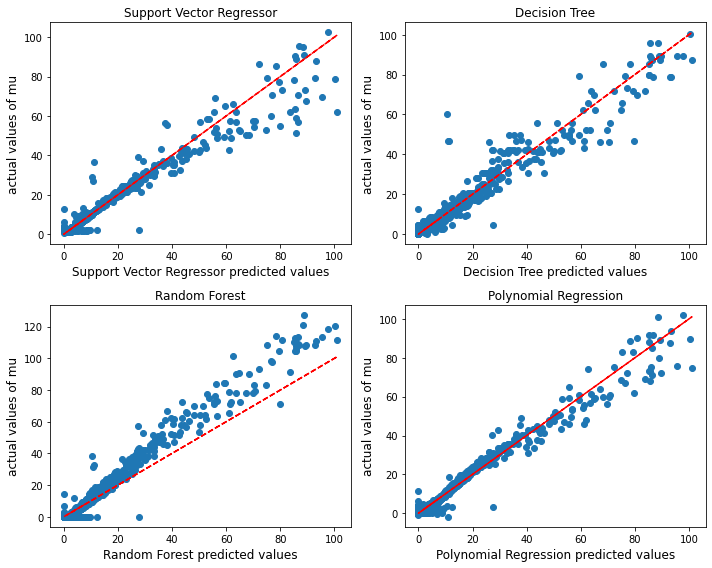

In [65]:
plotTitle2 = ["","Support Vector Regressor","Decision Tree","Random Forest","Polynomial Regression"]

#Error handling, making this immutable
predictionVariableNames2= tuple(predictionVariableNames2)
plt.figure(figsize=(10, 8))

i=1
for test in predictionVariableNames2:
    plt.subplot(2, 2, i)  
    plt.scatter(yTest2, test)
    plt.plot(yTest2.values, yTest2.values, label='Ideal Prediction', color='red', linestyle='--')
    plt.title(f"{plotTitle2[i]}", fontsize=12)
    plt.xlabel(f"{plotTitle2[i]} predicted values", fontsize=12)
    plt.ylabel(f"actual values of {targets[1]}", fontsize=12)
    i+=1
plt.tight_layout()
plt.show()

##### 2.3.5) Observation and Conclusion 

- By refering to the metrics displayed the four different models, we can say that the Random Forest Regressor gave us the best overall performance with the highest cross validation R2 score of 0.97 and strong test metrics of MAE = 1.75, MSE=13.33, R2=0.98, showing its robustness and accuracy. 

- The Support Vector Regressor also performed well, getting a cross validation R2 score of 0.96 and good test metrics of MAE=0.53, MSE=4.49, R2=0.96. 

- The Polynomial Regression achieved decent results of cross validation R2=0.96 but got higher MAE and MSE values on the test set indicating slightly reduced generalization. 

- The Decision Tree Regressor performed moderatly with a  cross validation R2 score of 0.94
but is behind the Random Forest in terms of consistency and accuracy.

- From the above plots we can notice that random Forest shows the best alignment with the diagonal line, indicating the most accurate predictions. Support Vector Regressor also performs well, with slightly more scatter. The Decision Tree and Polynomial Regression show more variability, especially for large values, suggesting lower predictive accuracy and generalization compared to Random Forest.

- From the metrics and plots we can conclude that random Forest and support Vector Regression come out as the top models for predicting "mu".

#### 2.4 Target Variable "tau"

In [66]:
df23 = df2.copy()

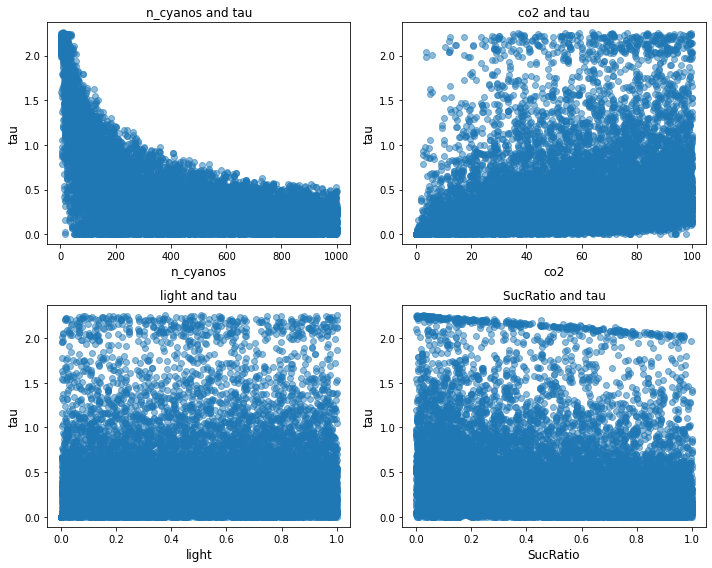

In [67]:
"""
Feature Relationship
"""
# targets[2] = "Tau"
plt.figure(figsize=(10, 8))
i = 1
for feature in features:
    plt.subplot(2, 2, i)  
    plt.scatter(df23[feature], df23[targets[2]], alpha=0.5)
    plt.title(f"{feature} and {targets[2]}", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(targets[2], fontsize=12)
    i += 1  

plt.tight_layout()
plt.show()


In [68]:
""" 
Log transformation of n_cyanos
"""
df23['n_cyanos']=np.log(df23['n_cyanos'])

In [69]:
""" 
Test train split
"""

scaler = StandardScaler()
X3 = df23[features]
y3 = df23[targets[2]]

# Splitting data into training and testing sets
XTrain3, XTest3, yTrain3, yTest3 = train_test_split(
    X3, y3, 
    test_size=0.20, 
    random_state=myStudentNumber,
    shuffle=True
)
# Splitting training data into train and validation sets
XTrain3, XValidation3, yTrain3, yValidation3 = train_test_split(
    XTrain3, yTrain3, 
    test_size=0.25,
    random_state=myStudentNumber, 
    shuffle=True
)


In [70]:
# Initialing  and applying StandardScaler
XTrain3 = scaler.fit_transform(XTrain3)
XValidation3 = scaler.transform(XValidation3)
XTest3 = scaler.transform(XTest3)
predictionVariableNames3 = []

##### 2.4.1) Pipeline 231 - Support Vector Regressor

In [71]:

#Defining the parameters for the grid search
paramGridSVR3 = {
    'gamma':  [0.001, 0.01, 0.1],  
    'epsilon':[0.1, 0.2, 0.3],
    'C':      [0.1, 1, 10],  
}

# Defining the model
svr3 = SVR(kernel='rbf')

# Defining the GridSearch cross validation object
gridSearchSVR3 = GridSearchCV(
    estimator=svr3, 
    param_grid=paramGridSVR3, 
    scoring='r2', 
    cv=5,
    n_jobs=-1
)

# Training support vector regression on training data along with grid search 
gridSearchSVR3.fit(XTrain3, yTrain3)

# Display best parameters and CV score from training
print("Best parameters:", gridSearchSVR3.best_params_)
print("Best CV R^2 score:", gridSearchSVR3.best_score_)

# Getting the best model
bestSVR3 = gridSearchSVR3.best_estimator_

# Validation metrics - for model selection/comparison
valdationPredictionsSvr3 = bestSVR3.predict(XValidation3)
validationMAE3 = mean_absolute_error(yValidation3, valdationPredictionsSvr3)
validationMSE3 = mean_squared_error(yValidation3, valdationPredictionsSvr3)
validationR23 = r2_score(yValidation3, valdationPredictionsSvr3)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAE3:.2f}")
print(f"Validation MSE: {validationMSE3:.2f}")
print(f"Validation R2: {validationR23:.2f}")



# Test metrics - final evaluation
testPredictionsSVR3 = bestSVR3.predict(XTest3)

testMaeSVR3 = mean_absolute_error(yTest3, testPredictionsSVR3)
testMseSVR3 = mean_squared_error(yTest3, testPredictionsSVR3)
testR2SVR3 = r2_score(yTest3, testPredictionsSVR3)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeSVR3:.2f}")
print(f"Test MSE: {testMseSVR3:.2f}")
print(f"Test R2: {testR2SVR3:.2f}")

#For plotting purposes
predictionVariableNames3.append(testPredictionsSVR3)

Best parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
Best CV R^2 score: 0.985347256234423

Validation Metrics:
Validation MAE: 0.04
Validation MSE: 0.00
Validation R2: 0.99

Test Metrics (Final Evaluation):
Test MAE: 0.04
Test MSE: 0.00
Test R2: 0.99


##### 2.4.2) Pipeline 232 - Decision Tree Regressor

In [72]:

# Define a parameter grid for the Decision Tree
paramGridDTree3 = {
    'max_depth': [5, 10, 15, 20, 30,35,40,100,200],        
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 5],         
    'criterion': ['squared_error', 'friedman_mse'] 
}

# Instantiate the model
DTree3 = DecisionTreeRegressor(random_state=myStudentNumber)

# Set up GridSearch
gridSearchDTree3 = GridSearchCV(
    estimator=DTree3,
    param_grid=paramGridDTree3,
    scoring='r2',       
    cv=5,               
    n_jobs=-1           
)

gridSearchDTree3.fit(XTrain3, yTrain3)

# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchDTree3.best_params_)
print("Best CV R^2 score:", gridSearchDTree3.best_score_)

# Getting the best model
bestDTree3 = gridSearchDTree3.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsDTree3 = bestDTree3.predict(XValidation3)
validationMAEDTree3 = mean_absolute_error(yValidation3, valdationPredictionsDTree3)
validationMSEDTree3 = mean_squared_error(yValidation3, valdationPredictionsDTree3)
validationR2DTree3 = r2_score(yValidation3, valdationPredictionsDTree3)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAEDTree3:.2f}")
print(f"Validation MSE: {validationMSEDTree3:.2f}")
print(f"Validation R2: {validationR2DTree3:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsDTree3 = bestDTree3.predict(XTest3)
testMaeDTree3 = mean_absolute_error(yTest3, testPredictionsDTree3)
testMseDTree3 = mean_squared_error(yTest3, testPredictionsDTree3)
testR2DTree3 = r2_score(yTest3, testPredictionsDTree3)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeDTree3:.2f}")
print(f"Test MSE: {testMseDTree3:.2f}")
print(f"Test R2: {testR2DTree3:.2f}")

#For plotting purposes
predictionVariableNames3.append(testPredictionsDTree3)


Best parameters: {'criterion': 'friedman_mse', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best CV R^2 score: 0.9815618431604524

Validation Metrics:
Validation MAE: 0.03
Validation MSE: 0.00
Validation R2: 0.98

Test Metrics (Final Evaluation):
Test MAE: 0.03
Test MSE: 0.00
Test R2: 0.98


##### 2.4.3) Pipeling 233 - Random Forest Regressor

In [73]:
# Defining a parameter grid for the Random Forest
paramGridRf3 = {
    'n_estimators': [50, 100, 200],     
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Definig the model
rf3 = RandomForestRegressor(random_state=myStudentNumber)

# Set up GridSearch for Random Forest
gridSearchRf3 = GridSearchCV(
    estimator=rf3,
    param_grid=paramGridRf3,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fitting the grid search on the training data
gridSearchRf3.fit(XTrain3, yTrain3)


# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchRf3.best_params_)
print("Best CV R^2 score:", gridSearchRf3.best_score_)

# Getting the best model
bestRf3 = gridSearchRf3.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsRf3 = bestRf3.predict(XValidation3)
validationMAERf3 = mean_absolute_error(yValidation3, valdationPredictionsRf3)
validationMSERf3 = mean_squared_error(yValidation3, valdationPredictionsRf3)
validationR2Rf3 = r2_score(yValidation3, valdationPredictionsRf3)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAERf3:.2f}")
print(f"Validation MSE: {validationMSERf3:.2f}")
print(f"Validation R2: {validationR2Rf3:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsRf3 = bestRf3.predict(XTest3)
testMaeRf3 = mean_absolute_error(yTest3, testPredictionsRf3)
testMseRf3 = mean_squared_error(yTest3, testPredictionsRf3)
testR2DRf3 = r2_score(yTest3, testPredictionsRf3)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeRf3:.2f}")
print(f"Test MSE: {testMseRf3:.2f}")
print(f"Test R2: {testR2DRf3:.2f}")


#For plotting purposes
predictionVariableNames3.append(testPredictionsRf3)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R^2 score: 0.9914529817299602

Validation Metrics:
Validation MAE: 0.02
Validation MSE: 0.00
Validation R2: 0.99

Test Metrics (Final Evaluation):
Test MAE: 0.02
Test MSE: 0.00
Test R2: 0.99


##### 2.4.4) Pipeline 234 - Polynomial Regression

In [74]:
# Defining the pipeling
polyRegressionpipeline3 = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('lin_reg', LinearRegression())
])

# Defining the parameter grid
paramGridPolyRegression3 = {
    'poly_features__degree': [1,2,3,4,5,6,7,8,9,10]
}

# Setting up GridSearch
gridSearchPolyRegression3 = GridSearchCV(
    estimator=polyRegressionpipeline3,
    param_grid=paramGridPolyRegression3,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fitting the training data
gridSearchPolyRegression3.fit(XTrain3, yTrain3)

# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchPolyRegression3.best_params_)
print("Best CV R^2 score:", gridSearchPolyRegression3.best_score_)

# Getting the best model
bestPolyRegression3 = gridSearchPolyRegression3.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsPloyRegression3 = bestPolyRegression3.predict(XValidation3)
validationMAEPolyRegression3 = mean_absolute_error(yValidation3, valdationPredictionsPloyRegression3)
validationMSEPolyRegression3 = mean_squared_error(yValidation3, valdationPredictionsPloyRegression3)
validationR2PolyRegression3 = r2_score(yValidation3, valdationPredictionsPloyRegression3)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAEPolyRegression3:.2f}")
print(f"Validation MSE: {validationMSEPolyRegression3:.2f}")
print(f"Validation R2: {validationR2PolyRegression3:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsPolyRegresion3 = bestPolyRegression3.predict(XTest3)
testMaeDTreePolyRegresion3 = mean_absolute_error(yTest3, testPredictionsPolyRegresion3)
testMseDTreePolyRegresion3 = mean_squared_error(yTest3, testPredictionsPolyRegresion3)
testR2PolyRegresion3 = r2_score(yTest3, testPredictionsPolyRegresion3)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeDTreePolyRegresion3:.2f}")
print(f"Test MSE: {testMseDTreePolyRegresion3:.2f}")
print(f"Test R2: {testR2PolyRegresion3:.2f}")


#For plotting purposes
predictionVariableNames3.append(testPredictionsPolyRegresion3)

Best parameters: {'poly_features__degree': 6}
Best CV R^2 score: 0.992045166790726

Validation Metrics:
Validation MAE: 0.02
Validation MSE: 0.00
Validation R2: 0.99

Test Metrics (Final Evaluation):
Test MAE: 0.02
Test MSE: 0.00
Test R2: 0.99


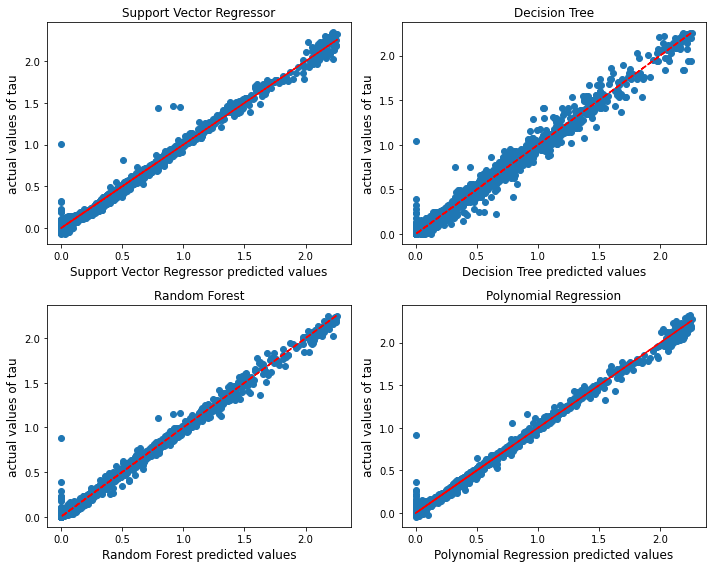

In [75]:
plotTitle3 = ["","Support Vector Regressor","Decision Tree","Random Forest","Polynomial Regression"]


plt.figure(figsize=(10, 8))

i=1
for test in predictionVariableNames3:
    plt.subplot(2, 2, i)  
    plt.scatter(yTest3, test)
    plt.plot(yTest3.values, yTest3.values, label='Ideal Prediction', color='red', linestyle='--')
    plt.title(f"{plotTitle3[i]}", fontsize=12)
    plt.xlabel(f"{plotTitle3[i]} predicted values", fontsize=12)
    plt.ylabel(f"actual values of {targets[2]}", fontsize=12)
    i+=1
plt.tight_layout()
plt.show()

##### 2.4.5) Observation and Conclusion

- The Random Forest Regressor has the best performance with cross validation R2 of 0.99 and very good validation and test metrics.

- Polynomial Regression also performed strongly with similar metrics, while the Decision Tree Regressor and Support Vector Regressor has shown slightly lower accuracy with cross-validation R2 scores of 0.98 and slightly higher MAE.

- However, the consistent zero MSE values across all models could be because of some issue that I was not able to identify. 

- Overall, Random Forest and Polynomial Regression emerged as the top-performing models for predicting "tau".

- From the above plots, we can see that Random Forest shows the best alignment with the line representing actual values, indicating the most accurate predictions for "tau".

- Support Vector Regressor also performs well, with sight scatter around the ideal line.

- The Decision Tree and Polynomial Regression show a bit more variability, particularly for high values of "tau", which suggests lower accuracy and generalization compared to Random Forest.

- Random Forest and Support Vector Regression come out as the best models for predicting "tau".

#### 2.5) Target Variable "a0"

In [76]:
df24 = df2.copy()

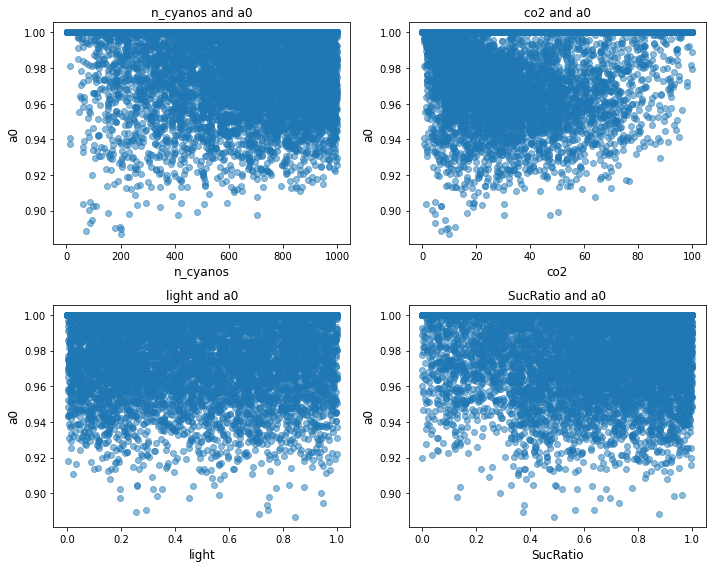

In [77]:
"""
Feature Relationship
"""

plt.figure(figsize=(10, 8))
i = 1
for feature in features:
    plt.subplot(2, 2, i)  
    plt.scatter(df24[feature], df24[targets[3]], alpha=0.5)
    plt.title(f"{feature} and {targets[3]}", fontsize=12)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel(targets[3], fontsize=12)
    i += 1  

plt.tight_layout()
plt.show()


The scatter plots show that the target variable "a0" has very little variability and is tightly clustered around 1, with no clear relationships with the input variables. The limited variability in "a0" will make it harder for models to identify meaningful patterns with the inputs.

In [78]:
""" 
Log transformation of n_cyanos
"""
df24['n_cyanos']=np.log1p(df24['n_cyanos'])


In [79]:
""" 
Test train split
"""

scaler = StandardScaler()
X4 = df24.drop(columns=targets)
y4 = df24[targets[3]]

# Splitting data into training and testing sets
XTrain4, XTest4, yTrain4, yTest4 = train_test_split(
    X4, y4, 
    test_size=0.20, 
    random_state=myStudentNumber,
    shuffle=True
)

# Splitting training data into train and validation sets
XTrain4, XValidation4, yTrain4, yValidation4 = train_test_split(
    XTrain4, yTrain4, 
    test_size=0.25,
    random_state=myStudentNumber, 
    shuffle=True
)


In [80]:
# Initialing  and applying StandardScaler
standardScaler = StandardScaler()
XTrain4 = standardScaler.fit_transform(XTrain4)
XValidation4 = standardScaler.transform(XValidation4)
XTest4 = standardScaler.transform(XTest4)
predictionVariableNames4 = []

##### 2.5.1) Pipeline 241 - Support Vector Regressor

In [81]:
#Defining the parameters for the grid search
paramGridSvr4 = {
    'gamma':  [0.1,0.12,0.13],  
    'epsilon':[0.01, 0.05,0.07], 
    'C':      [50,75,80,90],  
}

# Defining the model
svr4 = SVR(kernel='rbf')

# Defining the GridSearch cross validation object
gridSearchSvr4 = GridSearchCV(
    estimator=svr4, 
    param_grid=paramGridSvr4, 
    scoring='r2', 
    cv=5,
    n_jobs=-1
)

# Training support vector regression on training data along with grid search 
gridSearchSvr4.fit(XTrain4, yTrain4)

# Display best parameters and CV score from training
print("Best parameters:", gridSearchSvr4.best_params_)
print("Best CV R^2 score:", gridSearchSvr4.best_score_)

# Getting the best model
bestSVR4 = gridSearchSvr4.best_estimator_

# Validation metrics - for model selection/comparison
valdationPredictionsSvr4 = bestSVR4.predict(XValidation4)
validationMAE4 = mean_absolute_error(yValidation4, valdationPredictionsSvr4)
validationMSE4 = mean_squared_error(yValidation4, valdationPredictionsSvr4)
validationR24 = r2_score(yValidation4, valdationPredictionsSvr4)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAE4:.2f}")
print(f"Validation MSE: {validationMSE4:.2f}")
print(f"Validation R2: {validationR24:.2f}")



# Test metrics - final evaluation
testPredictionsSVR4 = bestSVR4.predict(XTest4)

testMaeSVR4 = mean_absolute_error(yTest4, testPredictionsSVR4)
testMseSVR4 = mean_squared_error(yTest4, testPredictionsSVR4)
testR2SVR4 = r2_score(yTest4, testPredictionsSVR4)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeSVR4:.2f}")
print(f"Test MSE: {testMseSVR4:.2f}")
print(f"Test R2: {testR2SVR4:.2f}")

#For plotting purposes
predictionVariableNames4.append(testPredictionsSVR4)

Best parameters: {'C': 90, 'epsilon': 0.01, 'gamma': 0.13}
Best CV R^2 score: 0.5139499249671522

Validation Metrics:
Validation MAE: 0.01
Validation MSE: 0.00
Validation R2: 0.53

Test Metrics (Final Evaluation):
Test MAE: 0.01
Test MSE: 0.00
Test R2: 0.54


##### 2.5.2) Pipeline 242 - Decision Tree Regressor

In [82]:

# Define a parameter grid for the Decision Tree
paramGridDTree4 = {
    'max_depth': [5, 10, 15, 20, 30,35,40,100,200],       
    'min_samples_split': [2, 5, 10],      
    'min_samples_leaf': [1, 2, 5],         
    'criterion': ['squared_error', 'friedman_mse']  
}

# Instantiate the model
DTree4 = DecisionTreeRegressor(random_state=myStudentNumber)

# Set up GridSearch
gridSearchDTree4 = GridSearchCV(
    estimator=DTree4,
    param_grid=paramGridDTree4,
    scoring='r2',       
    cv=5,               
    n_jobs=-1           
)

gridSearchDTree4.fit(XTrain4, yTrain4)

# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchDTree4.best_params_)
print("Best CV R^2 score:", gridSearchDTree4.best_score_)

# Getting the best model
bestDTree4 = gridSearchDTree4.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsDTree4 = bestDTree4.predict(XValidation4)
validationMAEDTree4= mean_absolute_error(yValidation4, valdationPredictionsDTree4)
validationMSEDTree4 = mean_squared_error(yValidation4, valdationPredictionsDTree4)
validationR2DTree4 = r2_score(yValidation4, valdationPredictionsDTree4)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAEDTree4:.2f}")
print(f"Validation MSE: {validationMSEDTree4:.2f}")
print(f"Validation R2: {validationR2DTree4:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsDTree4 = bestDTree4.predict(XTest4)
testMaeDTree4 = mean_absolute_error(yTest4, testPredictionsDTree4)
testMseDTree4 = mean_squared_error(yTest4, testPredictionsDTree4)
testR2DTree4 = r2_score(yTest4, testPredictionsDTree4)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeDTree4:.2f}")
print(f"Test MSE: {testMseDTree4:.2f}")
print(f"Test R2: {testR2DTree4:.2f}")

#For plotting purposes
predictionVariableNames4.append(testPredictionsDTree4)


Best parameters: {'criterion': 'squared_error', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV R^2 score: 0.571455720609361

Validation Metrics:
Validation MAE: 0.00
Validation MSE: 0.00
Validation R2: 0.64

Test Metrics (Final Evaluation):
Test MAE: 0.00
Test MSE: 0.00
Test R2: 0.61


##### 2.5.3) Pipeline 243 - Random Forest Regressor 

In [83]:
# Defineing a parameter grid for the Random Forest
paramGridRf4 = {
    'n_estimators': [50, 100, 200],     
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# Instantiate the model
rf4 = RandomForestRegressor(random_state=myStudentNumber)

# Setting up GridSearch for Random Forest
gridSearchRf4 = GridSearchCV(
    estimator=rf4,
    param_grid=paramGridRf4,
    scoring='r2',
    cv=10,
    n_jobs=-1
)

# Fitting the grid search on the training data
gridSearchRf4.fit(XTrain4, yTrain4)


# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchRf4.best_params_)
print("Best CV R^2 score:", gridSearchRf4.best_score_)

# Getting the best model
bestRf4 = gridSearchRf4.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsRf4 = bestRf4.predict(XValidation4)
validationMAERf4 = mean_absolute_error(yValidation4, valdationPredictionsRf4)
validationMSERf4 = mean_squared_error(yValidation4, valdationPredictionsRf4)
validationR2Rf4 = r2_score(yValidation4, valdationPredictionsRf4)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAERf4:.2f}")
print(f"Validation MSE: {validationMSERf4:.2f}")
print(f"Validation R2: {validationR2Rf4:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsRf4 = bestRf4.predict(XTest4)
testMaeRf4 = mean_absolute_error(yTest4, testPredictionsRf4)
testMseRf4 = mean_squared_error(yTest4, testPredictionsRf4)
testR2DRf4 = r2_score(yTest4, testPredictionsRf4)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeRf4:.2f}")
print(f"Test MSE: {testMseRf4:.2f}")
print(f"Test R2: {testR2DRf4:.2f}")


#For plotting purposes
predictionVariableNames4.append(testPredictionsRf4)


Best parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R^2 score: 0.6882648904644996

Validation Metrics:
Validation MAE: 0.00
Validation MSE: 0.00
Validation R2: 0.73

Test Metrics (Final Evaluation):
Test MAE: 0.00
Test MSE: 0.00
Test R2: 0.73


##### 2.5.4) Pipeline 244 - Polynomial Regression

In [84]:
polyRegressionpipeline4 = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('lin_reg', LinearRegression())
])

# 3) Define the parameter grid
paramGridPolyRegression4 = {
    'poly_features__degree': [1,2,3,4,5,6,7,8,9,10]
}

# 4) Set up GridSearch
gridSearchPolyRegression4 = GridSearchCV(
    estimator=polyRegressionpipeline4,
    param_grid=paramGridPolyRegression4,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# 5) Fit on training data
gridSearchPolyRegression4.fit(XTrain4, yTrain4)

# Displaying the best parameters and Cross validation score from training
print("Best parameters:", gridSearchPolyRegression4.best_params_)
print("Best CV R^2 score:", gridSearchPolyRegression4.best_score_)

# Getting the best model
bestPolyRegression4 = gridSearchPolyRegression4.best_estimator_

# Using the validation set to predict values and calulating Validation metrics
valdationPredictionsPloyRegression4 = bestPolyRegression4.predict(XValidation4)
validationMAEPolyRegression4 = mean_absolute_error(yValidation4, valdationPredictionsPloyRegression4)
validationMSEPolyRegression4 = mean_squared_error(yValidation4, valdationPredictionsPloyRegression4)
validationR2PolyRegression4 = r2_score(yValidation4, valdationPredictionsPloyRegression4)

print("\nValidation Metrics:")
print(f"Validation MAE: {validationMAEPolyRegression4:.2f}")
print(f"Validation MSE: {validationMSEPolyRegression4:.2f}")
print(f"Validation R2: {validationR2PolyRegression4:.2f}")



# Using the Test set to predict values and calulating Test metrics
testPredictionsPolyRegresion4 = bestPolyRegression4.predict(XTest4)
testMaeDTreePolyRegresion4 = mean_absolute_error(yTest4, testPredictionsPolyRegresion4)
testMseDTreePolyRegresion4 = mean_squared_error(yTest4, testPredictionsPolyRegresion4)
testR2PolyRegresion4 = r2_score(yTest4, testPredictionsPolyRegresion4)

print("\nTest Metrics (Final Evaluation):")
print(f"Test MAE: {testMaeDTreePolyRegresion4:.2f}")
print(f"Test MSE: {testMseDTreePolyRegresion4:.2f}")
print(f"Test R2: {testR2PolyRegresion4:.2f}")


#For plotting purposes
predictionVariableNames4.append(testPredictionsPolyRegresion4)

Best parameters: {'poly_features__degree': 8}
Best CV R^2 score: 0.5209302876799693

Validation Metrics:
Validation MAE: 0.01
Validation MSE: 0.00
Validation R2: 0.52

Test Metrics (Final Evaluation):
Test MAE: 0.01
Test MSE: 0.00
Test R2: 0.54


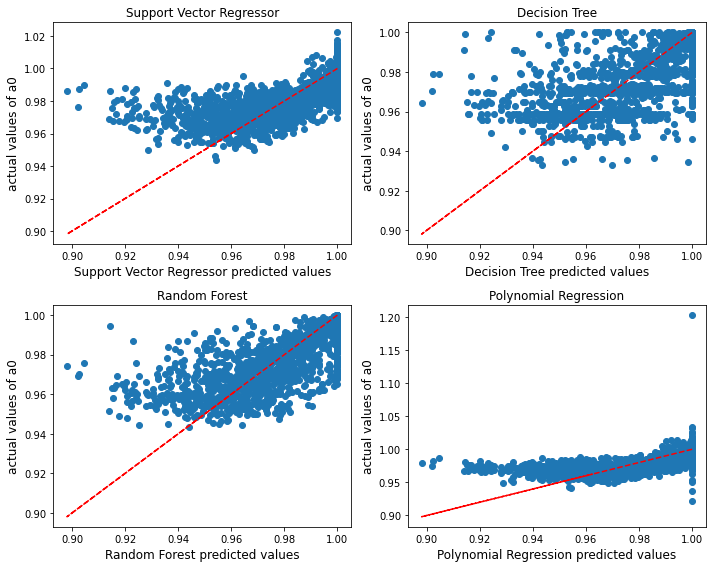

In [85]:
plotTitle4 = ["","Support Vector Regressor","Decision Tree","Random Forest","Polynomial Regression"]

#error handling
predictionVariableNames4 = tuple(predictionVariableNames4)
plt.figure(figsize=(10, 8))

i=1
for test in predictionVariableNames4:
    plt.subplot(2, 2, i)  
    plt.scatter(yTest4, test)
    plt.plot(yTest4.values, yTest4.values, label='Ideal Prediction', color='red', linestyle='--')
    plt.title(f"{plotTitle4[i]}", fontsize=12)
    plt.xlabel(f"{plotTitle4[i]} predicted values", fontsize=12)
    plt.ylabel(f"actual values of {targets[3]}", fontsize=12)
    i+=1
plt.tight_layout()
plt.show()

##### 2.5.5) Observation and Conclusion

Based on the metrics of the four models, Random Forest Regressor gave the best performance, achieving the highest cross validation R2 score of 0.69.However, all test and validation MSE and MAE values are displayed as 0, which indicates an issue that I was not able to identify.

The Polynomial Regression's performance was very average, with cross validation R2 score of 0.52, though it also displayed zero values for MSE and MAE.

The Decision Tree Regressor and Support Vector Regressor also shows similar issues, with lower cross-validation R2 scores 0.57 and zero MSE and MAE metrics.

From the above plots, we can observe that Random Forest shows the best alignment with the diagonal line, indicating the some level of accurate predictions among the lot.

Support Vector Regressor also performs relatively well, with slightly more scatter in the predictions.

The Decision Tree and Polynomial Regression show higher variability, mainly for larger values, suggesting lower predictive accuracy and generalization compared to Random Forest.

I also experimented with log-transforming the output variables to improve model performance, but the results were significantly worse, indicating that log transformation was not suitable for this data.

These are the best results I was able to achieve, and after several attempts, I was not able to improve the model's performance. 

Based on the metrics and plots, Random Forest and Support Vector Regression stand out as the top-performing models for predicting "a0."

---
---
# 3) NLP

In [86]:
""" 
Data import
"""
df3 = pd.read_csv('news.csv', sep='\t', header=0)
print(df3.head(10))

                                               story
0  Quarterly profits at US media giant TimeWarner...
1  The dollar has hit its highest level against t...
2  The owners of embattled Russian oil giant Yuko...
3  British Airways has blamed high fuel prices fo...
4  Shares in UK drinks and food firm Allied Domec...
5  Japan's economy teetered on the brink of a tec...
6  The US created fewer jobs than expected in Jan...
7  India, which attends the G7 meeting of seven l...
8  Ethiopia produced 14.27 million tonnes of crop...
9  A US government claim accusing the country's b...


#### 3.1) Pipeline 1

##### 3.1.1) Expoloratory Data Analysis

In [87]:
''' 
Checking info and duplicates
'''
df31 = df3.copy()
print(df31.info())
print(f"Duplicates: {df3.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   story   2225 non-null   object
dtypes: object(1)
memory usage: 17.5+ KB
None
Duplicates: 133


In [88]:
"""
Removing duplicates 
"""
df31.drop_duplicates(inplace=True)

In [89]:
""" 
Getting word count for each story and calculating text length
This will help us understand the distribution of text sizes in the dataset
"""
df31['textLength'] = df31['story'].apply(len)
df31['wordCount'] = df31['story'].apply(lambda x: len(x.split()))
print(df31[['textLength', 'wordCount']].describe())

         textLength    wordCount
count   2092.000000  2092.000000
mean    2231.166348   378.765774
std     1385.410810   241.941953
min      470.000000    84.000000
25%     1405.750000   239.000000
50%     1918.500000   324.000000
75%     2770.250000   466.250000
max    25453.000000  4428.000000


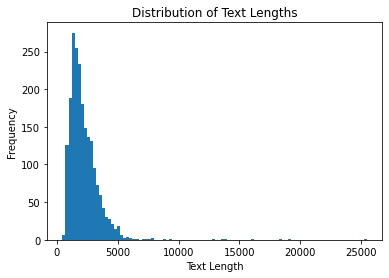

In [90]:
""" 
Checking the distribution fo the text length will help us understnading variability in document size.
"""
plt.hist(df31['textLength'],bins=100)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


##### 3.1.2) Preprocessing and Normalization

In [91]:
""" 
Text preprocessing
"""
# Case folding
df31['processedText'] = df31['story'].str.lower()  

# Removing digits
df31['processedText'] = df31['processedText'].str.replace(r'\d+', '', regex=True) 

# Removing punctuation
df31['processedText'] = df31['processedText'].str.replace(r'[^\w\s]', '', regex=True)  

# Removing Stop words
stopWords = set(stopwords.words('english'))
df31['processedText'] = df31['processedText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopWords]))

# Lemmatization
lemmatizer = WordNetLemmatizer()
df31['processedText'] = df31['processedText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# #Stemming
# stemmer = PorterStemmer()
# df31['processedText'] = df31['processedText'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Removing Extra whitespace
df31['processedText'] = df31['processedText'].str.strip().str.replace(r'\s+', ' ', regex=True)





The above code chunk performs text processing, stemming is commented out as lemmatization provided better results. All these processed text is stored in "processedText" column

In [92]:
df31.head(10)

,story,textLength,wordCount,processedText
0,Quarterly profits at US media giant TimeWarner...,2524,415,quarterly profit u medium giant timewarner jum...
1,The dollar has hit its highest level against t...,2218,379,dollar hit highest level euro almost three mon...
2,The owners of embattled Russian oil giant Yuko...,1516,258,owner embattled russian oil giant yukos ask bu...
3,British Airways has blamed high fuel prices fo...,2366,400,british airway blamed high fuel price drop pro...
4,Shares in UK drinks and food firm Allied Domec...,1534,260,share uk drink food firm allied domecq risen s...
5,Japan's economy teetered on the brink of a tec...,1153,180,japan economy teetered brink technical recessi...
6,The US created fewer jobs than expected in Jan...,1635,277,u created fewer job expected january fall jobs...
7,"India, which attends the G7 meeting of seven l...",1888,315,india attends g meeting seven leading industri...
8,Ethiopia produced 14.27 million tonnes of crop...,1459,224,ethiopia produced million tonne crop higher av...
9,A US government claim accusing the country's b...,1413,222,u government claim accusing country biggest to...


##### 3.1.3) Term Frequency-Inverse Document Frequency Transformation

Term Frequency-Inverse Document Frequency (TF-IDF) transformation converts our news text into numbers by calculating how important a word is in a collection. It combines how often a word appears in a document with how unique the word is across all documents, giving higher weights to rare but important words while reducing weight to common ones. TFIDF will be used in our first pipeline.

In [93]:

# Defining parameter grid for TF-IDF vectorizer (Pipeline 1)
paramGridTFIDF31 = {
    'max_features': [3000, 5000, 10000],  
    'ngram_range': [(1, 1), (1, 2)],  
    'min_df': [2, 5],  
    'max_df': [0.6, 0.8] 
}

# Initializing variables to store the best results
bestScore31 = -1
bestParams31 = None
bestKMeansModel31 = None
bestVectorizer31 = None

# Manual grid search
for max_features31 in paramGridTFIDF31['max_features']:
    for ngram_range31 in paramGridTFIDF31['ngram_range']:
        for min_df31 in paramGridTFIDF31['min_df']:
            for max_df31 in paramGridTFIDF31['max_df']:

                # Initializing the TF-IDF vectorizer with current parameters
                tfidfVectorizer31 = TfidfVectorizer(
                    max_features=max_features31,
                    ngram_range=ngram_range31,
                    min_df=min_df31,
                    max_df=max_df31
                )
                
                # Transforming the text data
                tfidfFeatures31 = tfidfVectorizer31.fit_transform(df31['processedText'])
                
                # Applying KMeans clustering
                kmeans31 = KMeans(n_clusters=5, random_state=myStudentNumber)
                kmeansLabels31 = kmeans31.fit_predict(tfidfFeatures31)

                # Calculate Silhouette Score
                score31 = silhouette_score(tfidfFeatures31, kmeansLabels31)
                
                # Updatin the best parameters if the current score is better
                if score31 > bestScore31:
                    bestScore31 = score31
                    bestParams31 = {
                        'max_features': max_features31,
                        'ngram_range': ngram_range31,
                        'min_df': min_df31,
                        'max_df': max_df31
                    }
                    bestKMeansModel31 = kmeans31
                    bestVectorizer31 = tfidfVectorizer31

# Printing the best parameters and silhouette score
print(f"Best Parameters for TF-IDF (Pipeline 1): {bestParams31}")
print(f"Best Silhouette Score for TF-IDF (Pipeline 1): {bestScore31:.4f}")

# Transforming the data using the best TF-IDF vectorizer
finalTFIDFFeatures31 = bestVectorizer31.transform(df31['processedText'])
print(f"Shape of Final TF-IDF Features: {finalTFIDFFeatures31.shape}")
tfidfPreview31 = finalTFIDFFeatures31.toarray()[:5] 
print(tfidfPreview31)


Best Parameters for TF-IDF (Pipeline 1): {'max_features': 3000, 'ngram_range': (1, 2), 'min_df': 5, 'max_df': 0.6}
Best Silhouette Score for TF-IDF (Pipeline 1): 0.0213
Shape of Final TF-IDF Features: (2092, 3000)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.36028647 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


The above code does a manual grid search to optimize hyperparameters for the TF-IDF vectorizer, including max_features, ngram_range, min_df, and max_df. It applies K-means clustering on the transformed text data, evaluating the clustering quality using the Silhouette Score. The TF-IDF model achieves a Silhouette Score of 0.0213.

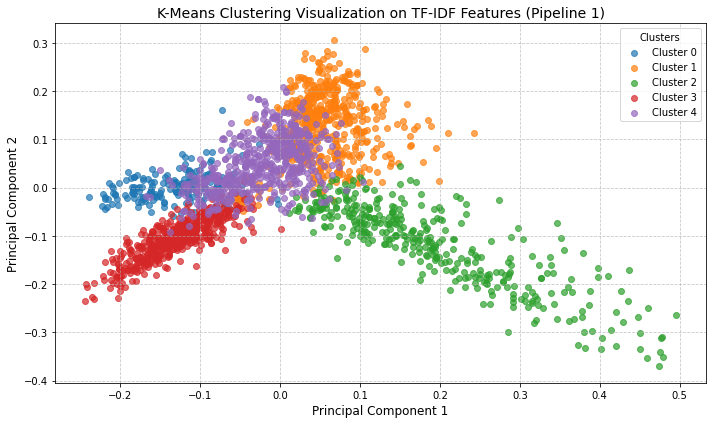

In [94]:
# Applying PCA to reduce TF-IDF features to 2 components
pca31 = PCA(n_components=2, random_state=myStudentNumber)
tfidfPCAFeatures31 = pca31.fit_transform(finalTFIDFFeatures31.toarray())

# Creating a scatter plot for each cluster
plt.figure(figsize=(10, 6))
uniqueClusters31 = np.unique(bestKMeansModel31.labels_)  # Unique clusters
for cluster31 in uniqueClusters31:
    clusterPoints31 = tfidfPCAFeatures31[bestKMeansModel31.labels_ == cluster31]
    plt.scatter(
        clusterPoints31[:, 0], clusterPoints31[:, 1], 
        label=f"Cluster {cluster31}", 
        alpha=0.7
    )

# Adding plot details
plt.title("K-Means Clustering Visualization on TF-IDF Features (Pipeline 1)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Clusters", fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [95]:
# Getting top terms for each cluster
terms = bestVectorizer31.get_feature_names_out()
for i in range(bestKMeansModel31.n_clusters):
    print(f"Cluster {i} top terms:")
    clusterTerms = bestKMeansModel31.cluster_centers_[i].argsort()[-10:]
    print(", ".join(terms[clusterTerms]))

Cluster 0 top terms:
year, director, actress, festival, star, oscar, actor, best, award, film
Cluster 1 top terms:
growth, price, sale, share, bank, market, year, firm, company, bn
Cluster 2 top terms:
brown, minister, would, tory, government, blair, party, election, labour, mr
Cluster 3 top terms:
side, champion, cup, team, club, match, win, england, player, game
Cluster 4 top terms:
one, service, user, show, technology, phone, mobile, game, people, music


#### 3.2) Pipeline 2

We will use the same preprocessed data for this pipeline and implement bag of words text vectorization technique

In [96]:
df32 = df31.copy()

##### 3.2.1) Bag of words Transformation 

Bag of Words (BoW) converts text into a numbers by counting the frequency of each word in a document, ignoring grammar and order. It creates a sparse matrix where rows represent documents, columns represent unique words, and values are word frequencies.

In [97]:
# Defining parameter grid for CountVectorizer (Pipeline 2)
paramGridBoW32 = {
    'max_features': [3000, 5000, 10000],  # Vocabulary size
    'ngram_range': [(1, 1), (1, 2)],  # Unigrams, Bigrams
    'min_df': [2, 5],  # Minimum document frequency
    'max_df': [0.6, 0.8]  # Maximum document frequency
}

# Initializing variables to store the best results
bestScore32 = -1
bestParams32 = None
bestKMeansModel32 = None
bestVectorizer32 = None

# Manual grid search for hyperparameter tuning
for maxFeatures32 in paramGridBoW32['max_features']:
    for ngramRange32 in paramGridBoW32['ngram_range']:
        for minDf32 in paramGridBoW32['min_df']:
            for maxDf32 in paramGridBoW32['max_df']:

                # Initializing the CountVectorizer with current parameters
                bowVectorizer32 = CountVectorizer(
                    max_features=maxFeatures32,
                    ngram_range=ngramRange32,
                    min_df=minDf32,
                    max_df=maxDf32
                )
                
                # Transforming the text data
                bowFeatures32 = bowVectorizer32.fit_transform(df32['processedText'])
                
                # Applying KMeans clustering
                kmeans32 = KMeans(n_clusters=5, random_state=myStudentNumber)
                kmeansLabels32 = kmeans32.fit_predict(bowFeatures32)

                # Calculating Silhouette Score
                try:
                    score32 = silhouette_score(bowFeatures32, kmeansLabels32)
                except ValueError:
                    # Handle cases where Silhouette Score cannot be computed
                    score32 = -1

                # Updating the best parameters if the current score is better
                if score32 > bestScore32:
                    bestScore32 = score32
                    bestParams32 = {
                        'max_features': maxFeatures32,
                        'ngram_range': ngramRange32,
                        'min_df': minDf32,
                        'max_df': maxDf32
                    }
                    bestKMeansModel32 = kmeans32
                    bestVectorizer32 = bowVectorizer32

# Printing the best parameters and silhouette score
if bestScore32 > -1:
    print(f"Best Parameters for BoW (Pipeline 2): {bestParams32}")
    print(f"Best Silhouette Score for BoW (Pipeline 2): {bestScore32:.4f}")
else:
    print("Silhouette Score could not be computed for any parameter combination.")


finalBoWFeatures32 = bestVectorizer32.transform(df32['processedText'])
print(f"Shape of Final BoW Features: {finalBoWFeatures32.shape}")
bowPreview32 = finalBoWFeatures32.toarray()[:5]  
print(bowPreview32)



Best Parameters for BoW (Pipeline 2): {'max_features': 10000, 'ngram_range': (1, 2), 'min_df': 5, 'max_df': 0.6}
Best Silhouette Score for BoW (Pipeline 2): 0.3950
Shape of Final BoW Features: (2092, 10000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The above code performs a manual grid search over different hyperparameter values for CountVectorizer(BOW) and applies K-means clustering to the transformed text data. The scoring criteria is based on Silhouette Score, which measures the quality of clustering.
The above BOW model gets a score of 0.3626 

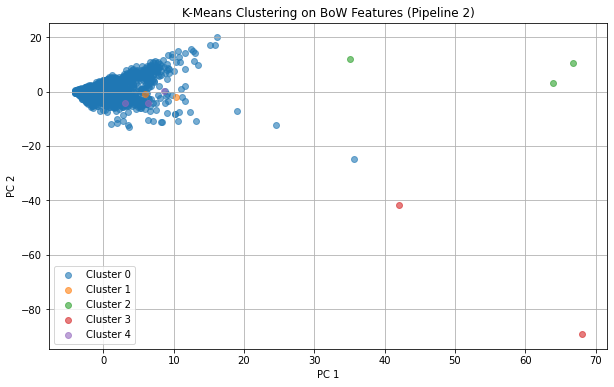

In [98]:
# Applying PCA to reduce BoW features to 2 components
pca32 = PCA(n_components=2, random_state=myStudentNumber)
bowPCAFeatures32 = pca32.fit_transform(finalBoWFeatures32.toarray())

# Visualizing the clusters
plt.figure(figsize=(10, 6))
for cluster in range(bestKMeansModel32.n_clusters):
    clusterPoints = bowPCAFeatures32[bestKMeansModel32.labels_ == cluster]
    plt.scatter(clusterPoints[:, 0], clusterPoints[:, 1], label=f"Cluster {cluster}", alpha=0.6)

plt.title("K-Means Clustering on BoW Features (Pipeline 2)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid()
plt.show()

In [99]:
# Getting top terms for each cluster in Pipeline 2
terms32 = bestVectorizer32.get_feature_names_out()  # Retrieve feature names from the best vectorizer
for i in range(bestKMeansModel32.n_clusters):
    print(f"Cluster {i} top terms:")
    # Retrieving top 10 terms for the current cluster
    clusterTerms32 = bestKMeansModel32.cluster_centers_[i].argsort()[-10:]
    print(", ".join(terms32[clusterTerms32]))


Cluster 0 top terms:
time, could, game, one, new, people, also, would, year, mr
Cluster 1 top terms:
keep, deal, steven, stadium, club, new, gerrard, would, parry, liverpool
Cluster 2 top terms:
kilroysilk, one, increase, party, minimum wage, minimum, mr, government, wage, people
Cluster 3 top terms:
think, robbie, people, angel, award, year, urban, best, song, music
Cluster 4 top terms:
home, software, small, machine, computer, apple, pc, mac mini, mini, mac


#### 3.3) Conclusion and Discussion

While both pipelines provided some insights and a clear clustering of different types of words as seen in the both pipelines. The BoW approach yielded better Silhouette score, suggesting  that its better. The manual grid search that we implemented lacks quality scoring metric as generally hyperparameter tuning is used to get best parameters for ml models but we have used a different approach of using hyperparameter tuning for getting parameters for text vectorization. Also K value for k-means was chosen at random, performing elbow method and then choosing k would be a good idea.

---
---
---
Below is the project brief that was given, have combined all, Converted the cell to py and commented out for housekeeping.

In [101]:

# # CSC8635 Mini-projects
# ## Introduction

# This document defines three project-style questions which go more deeply into different aspects of the module's content. You have to answer **ALL** of these project-stye questions.

# The learning objectives of this assignment are:
# 1. To learn about the design of machine learning analysis pipelines
# 2. To understand how to select appropriate methods given the dataset type
# 3. To learn how to conduct machine learning experimentation in a rigorous and effective manner
# 4. To critically evaluate the performance of the designed machine learning pipelines
# 5. To learn and practice the skills of reporting machine learning experiments

# For this coursework you will be provided with three different datasets each of a different nature:
# 1. A tabular dataset (defined as a classification problem)
# 2. A tabular dataset (defined as a regression problem)
# 3. A text dataset

# Your job is easy to state: You should design a range of machine learning pipelines appropriate to the nature of each dataset. Overall, we expect that you will perform a thorough investigation involving (whenever relevant) all parts of a machine learning pipeline (exploration, preprocessing, model training, model interpretation and evaluation), evaluating a range of options for all parts of the pipeline and with proper hyperparameter tuning.

# You will have to write a short report (as part of this notebook) that presents the experiments you did, their justification, a detailed description of the performance of your designed pipelines using the most appropriate presentation tools (e.g., tables of results, plots). We expect that you should be able to present your work at a level of detail that would enable a fellow student to reproduce your steps.

# ## Deliverables
# An inline report and code blocks addressing the marking scheme below. The report is expected to have 1000 to 2000 words. The word count excludes references, tables, figures, code blocks and section headers, and has a 10% leeway.

# ## Marking scheme

# - Dataset exploration: 10 marks
# - Methods: 30 marks
# - Results of analysis: 30 marks
# - Discussion: 20 marks
# - Presentation (Writing Style, references, figures, etc.): 10 marks

# This marking scheme will be applied separately to each mini-project. The overall mark will give 40% weight to mini-projects 1 and 2 (classification and regression) and 20% weight to mini-project 3 (NLP).

# Some help for good marks:
# - Split your work up into separate code blocks to help the reader understand what you have done.
# - Provide text blocks, between code blocks, which help expalin what your code blocks are doing.
# - It's not just about applying the first pipeline you find and using default hyperparameters but trying different pipelines and optimising the hyperparameters.
# - We expect the solutions that you use to be based on the machine learning techniques you have been taught in the lectures/practicals.
# - Note there are marks for presentation, so think about this both for the code, outputs and text you write.




# ---
# ---
# ## Dataset 1: Classification

# The dataset, called FARS, is a collection of statistics of US road traffic accidents. The class label (target variable) is about the severity of the accident. It has 20 features and over 100K examples. The dataset is available in Canvas as a CSV file, in which the last column contains the class labels: https://ncl.instructure.com/courses/59112/files/8967354?wrap=1

# ## What you need to do:

# You will need to perform the following steps on the dataset:
# 1. EDA
# 2. Data normalisation
# 3. Split the data into training and test sets using cross-validation
# 4. Develop **four** machine learning pipelines for classifying the severity of the accident
# 5. Present the results for your pipelines using the most appropriate set of metrics.
# 6. Provide a short report on which approaches you used and which gave the best results. It would be good to consider why particular pipelines gave the best results.

# Some help for good marks:
# - We expect that you evaluate a very broad range of options for the design of your machine learning pipelines, including (but not limited to) data normalisation, feature/instance selection, class imbalance correction, several (appropriate) machine learning models and hyperparameter tuning.

# ---
# ---
# ## Dataset 2: Regression

# In this part of the coursework you are going to look at a regession problem - predicting the growth rate of a bacteria. The provided dataset contains results from a set of experiments where we grew bacteria of different strains and under different conditions (CO2 availability, light, etc..) to compute a growth curve for the bacteria - represented by the variables 'a', 'mu', 'tau' and 'a0'. Your job is to predict the results of the experiment - 'a', 'mu', 'tau' and 'a0' (these are the growth-rate parameters for the bacteria, but you don't need to understand the details to do the coursework).

# The dataset is available from https://ncl.instructure.com/courses/59112/files/8967383?wrap=1

# The CSV contains 9 fields as follows:

# | variable | description |
# |-----|------|
# | n_cyanos | The number of Cyanobacteria available at the start |
# | co2 | The amount of CO2 available |
# | light | The amount of light available |
# | SucRatio | How good the bacteria is at producing sucrose |
# | Nsample | Experiment number |
# | a | Maximum number of bacteria seen (Target variable) |
# | mu | Growth rate of bacteria (Target variable) |
# | tau | Time delay before bacteria starts growing (Target variable) |
# | a0 | Initial level of bacteria (Target variable) |

# ---
# ---
# ## Dataset 3: NLP

# In this part of the coursework you will be looking at a dataset containing text from news articles. These are stored in a CSV file, however, as the news articles use commas you will need to use a tab as the separator when reading in the file.

# The file contains just one feature - the news story, one per line.

# The dataset can be downloaded from: https://ncl.instructure.com/courses/59112/files/8967387?wrap=1

# ## What you need to do:

# You will need to perform the following steps on the dataset:
# 1. EDA
# 2. Build **two** pipelines to transform the text into a format which can be handled by a machine learning model
# 3. Work out how many types of news articles are present in the dataset
# 4. Present the results for your work in the most appropriate means.
# 5. Provide a short report on which approaches you used and which gave the best results.

# Some help for good marks:
# - This part of the coursework is all about how to convert the data into a format that you can feed into a machine learning model. It is not about using the machine learning models. Focus on how you can make your conversion as good as possible.
# - We are not expecting a particular number for 'how many types of news articles are present'. This is more about you presenting the data and trying to justify a number.
# - Hyperparameter tuning is essential for this.



